# ***Understanding Mental Health Inequality on a Global Scale***
*(Using Supervised and Unsupervised Learning Models)*




#### Submitted by ~ *Mahek Patel*

### **Objective Question:**
*"Can machine learning techniques uncover global patterns and disparities in the burden of mental health conditions and predict the presence of access-related infrastructure such as policies and workforce availability?"*

### **Introduction**
Mental health plays a vital role in overall well-being of a person, and yet, mental healthcare remains one of the most unequally distributed health services across the world. While some countries have robust mental health policies and specialist availability, others face gaps in care, funding, and infrastructure. These disparities are often shaped by deeper structural and socioeconomic differences.

This project aims to analyze global mental health indicators using real-world, country-level datasets. We apply different machine learning techniques/models to uncover hidden patterns and build predictive models that help us better understand access to mental healthcare across nations.

### **Models Used and Their Purpose**
- ***Principal Component Analysis (PCA):***  
  Reduces dimensionality and helps identify the most influential features across countries.

- ***K-Means Clustering:***  
  Groups countries based on similarities in mental health burden and infrastructure.

- ***Hierarchical Clustering:***  
  Uncovers nested relationships between countries for deeper regional insights.

- ***Decision Tree Classifier:***  
  Predicts whether a country has a national mental health policy based on available features.

- ***Random Forest Classifier:***  
  Improves prediction accuracy and identifies the most important variables influencing policy presence.

- ***Support Vector Machine (SVM):***  
  Used for more complex, non-linear classification boundaries in policy prediction.

###### '''Through this combination of models, we seek to both explore the structure of mental health disparities and understand what factors contribute to better national support systems.'''

### Importing Libraries

In [136]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.utils.extmath import randomized_svd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore the warnings (just in case)
import warnings
warnings.filterwarnings("ignore")

### Data Loading

###### Loading both the raw and basic_cleaned versions of data.

In [5]:
# GDP
gdp_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\gdp.csv", skiprows=4)
gdp_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\gdp_new.csv")

In [6]:
# Country Codes
country_code_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\country_code.csv")
country_code_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\country_codes_new.csv")

In [7]:
# Access to care

## Mental Health Policies
policies_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\access to care (2011-2021)\mental_health_policies.csv")
policies_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_policies_new.csv")

## Mental Health Legislation
legislation_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\access to care (2011-2021)\mental_health_legislation.csv")
legislation_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_legislation_new.csv")

## Mental Health Services
services_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\access to care (2011-2021)\mental_health_services.csv")
services_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_services_new.csv")

## Mental Health Financing
financing_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\access to care (2011-2021)\mental_health_financing.csv")
financing_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_financing_new.csv")

## Mental Health Workforce
workforce_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\access to care (2011-2021)\mental_health_workforce.csv")
workforce_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_workforce_new.csv")

## General Health System Score
general_health_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\access to care (2011-2021)\general_health_system_score.csv")
general_health_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\general_hs_score_cleaned.csv")

In [8]:
# Disorders

## Anxiety Disorders
anxiety_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\disorders (2019-2021)\anxiety.csv")
anxiety_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new disorders\anxiety_cleaned.csv")

## Bipolar Disorder
bipolar_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\disorders (2019-2021)\bipolar.csv")
bipolar_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new disorders\bipolar_cleaned.csv")

## Depression
depression_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\disorders (2019-2021)\depression.csv")
depression_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new disorders\depression_cleaned.csv")

## Eating Disorders
eating_disorders_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\disorders (2019-2021)\eating_dis.csv")
eating_disorders_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new disorders\eating_dis_cleaned.csv")

## Schizophrenia
schizophrenia_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\disorders (2019-2021)\schizophrenia.csv")    
schizophrenia_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new disorders\schizophrenia_cleaned.csv")

## Self-harm
self_harm_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\disorders (2019-2021)\self_harm.csv")
self_harm_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new disorders\self_harm_cleaned.csv")

In [9]:
# Substance Use Disorders

## Alcohol Use Disorder
alcohol_use_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\substance use\alcohol.csv")
alcohol_use_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new substance use\alcohol_cleaned.csv")

## Drug Use Disorder
drug_use_raw1 = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\substance use\drug1.csv")
drug_use_raw2 = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\substance use\drug2.csv")
drug_use_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new substance use\drug_combined_cleaned.csv")

In [10]:
# Psychiatrists per capita
psychiatrists_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\psychiatrists_per100000.csv")

### **Data Exploration**

In [11]:
# GDP Data — Raw Data
print("GDP Dataset (Raw Data):")
display(gdp_raw.head())

# GDP Data — After Basic Cleaning
print("\nGDP Dataset (Cleaned):")
display(gdp_clean.head())

GDP Dataset (Raw Data):


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079,30559.533535,33984.790620,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.132432,186.947182,197.408105,225.447007,209.005786,226.883067,...,1329.777824,1520.171298,1538.924188,1493.780445,1344.080962,1522.590088,1628.024526,1659.515290,NaN,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,415.707417,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.938353,127.452629,133.825452,139.006714,148.547736,155.563837,...,1616.843198,1560.162999,1703.896392,1783.654365,1664.249176,1747.840549,1777.235012,1568.724310,NaN,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2308.159767,NaN,NaN



GDP Dataset (Cleaned):


,Country Name,Country Code,GDP_2011,GDP_2012,GDP_2013,GDP_2014,GDP_2015,GDP_2016,GDP_2017,GDP_2018,GDP_2019,GDP_2020,GDP_2021
0,Aruba,ABW,25712.384302,25119.665545,25813.576727,26129.839062,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.932320,27200.061079
1,Africa Eastern and Southern,AFE,1735.585140,1702.969258,1673.140476,1656.107642,1479.564123,1329.777824,1520.171298,1538.924188,1493.780445,1344.080962,1522.590088
2,Afghanistan,AFG,606.694676,651.417134,637.087099,625.054942,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214
3,Africa Western and Central,AFW,1824.722827,1920.119912,2113.316986,2204.995700,1845.767804,1616.843198,1560.162999,1703.896392,1783.654365,1664.249176,1747.840549
4,Angola,AGO,4615.910598,5086.027401,5057.747878,5005.999741,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661


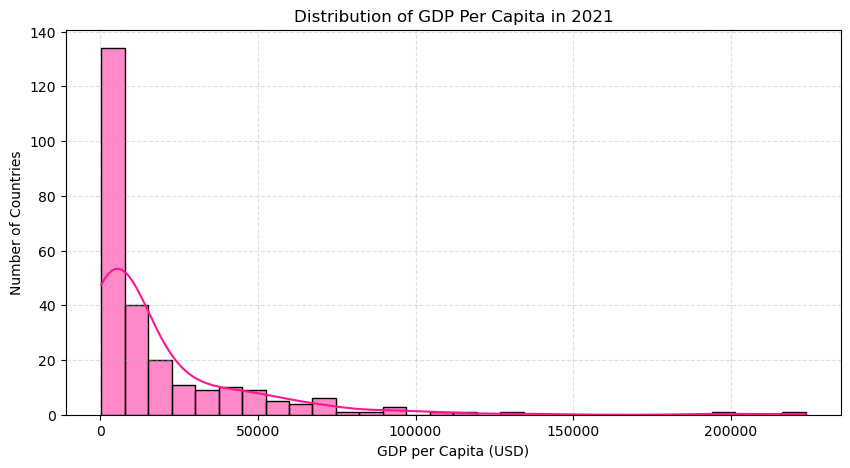

In [12]:
# GDP distribution plot for latest year
plt.figure(figsize=(10, 5))
sns.histplot(gdp_clean['GDP_2021'].dropna(), bins=30, kde=True, color='deeppink')
plt.title("Distribution of GDP Per Capita in 2021")
plt.xlabel("GDP per Capita (USD)")
plt.ylabel("Number of Countries")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [13]:
# Country Codes — Raw Data
print("Country Codes (Raw Data):")
display(country_code_raw.head())

# Country Codes — After Basic Cleaning
print("\nCountry Codes (Cleaned):")
display(country_code_clean.head())

Country Codes (Raw Data):


,Dimension,Code,Title,ParentDimension,ParentCode,ParentTitle
0,COUNTRY,ABW,Aruba,REGION,AMR,Americas
1,COUNTRY,AFG,Afghanistan,REGION,EMR,Eastern Mediterranean
2,COUNTRY,AGO,Angola,REGION,AFR,Africa
3,COUNTRY,AIA,Anguilla,REGION,AMR,Americas
4,COUNTRY,ALB,Albania,REGION,EUR,Europe



Country Codes (Cleaned):


,Title,Code
0,Aruba,ABW
1,Afghanistan,AFG
2,Angola,AGO
3,Anguilla,AIA
4,Albania,ALB


In [14]:
# Mental Health Policies — Raw Data
print("Mental Health Policies (Raw Data):")
display(policies_raw.head())

# Mental Health Policies — After Basic Cleaning
print("\nMental Health Policies (Cleaned):")
display(policies_clean.head())

# Policy Presence Value Counts
print("\nPolicy Presence Value Counts:")
print(policies_clean['Has_MH_Policy'].value_counts())

Mental Health Policies (Raw Data):


,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,DisaggregatingDimension2,DisaggregatingDimension2ValueCode,...,DataSourceDimensionValueCode,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,2282744,MH_1,COUNTRY,MOZ,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,2013-10-10T13:17:09Z,2011,2011-01-01,2011-12-31
1,2282757,MH_1,COUNTRY,MRT,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2013-10-10T13:17:09Z,2011,2011-01-01,2011-12-31
2,2282780,MH_1,COUNTRY,MUS,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,2013-10-10T13:17:10Z,2011,2011-01-01,2011-12-31
3,2282791,MH_1,COUNTRY,MWI,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,2013-10-10T13:17:10Z,2011,2011-01-01,2011-12-31
4,2282803,MH_1,COUNTRY,MYS,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2013-10-10T13:17:10Z,2011,2011-01-01,2011-12-31



Mental Health Policies (Cleaned):


,Code,Year,Has_MH_Policy
0,MOZ,2011,No
1,MRT,2011,Yes
2,MUS,2011,No
3,MWI,2011,No
4,MYS,2011,Yes



Policy Presence Value Counts:
Has_MH_Policy
Yes    110
No      72
Name: count, dtype: int64


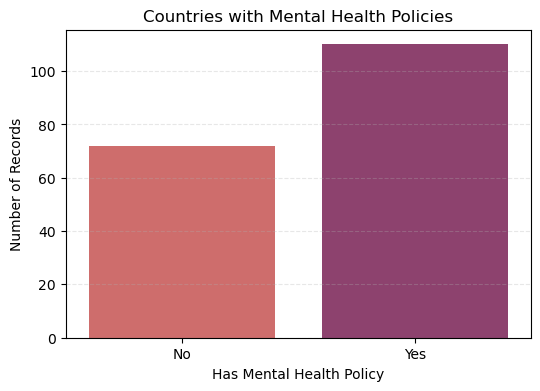

In [15]:
# Policy presence plot across all countries (OPTIONAL!!)
plt.figure(figsize=(6, 4))
sns.countplot(x='Has_MH_Policy', data=policies_clean, palette='flare')
plt.title("Countries with Mental Health Policies")
plt.xlabel("Has Mental Health Policy")
plt.ylabel("Number of Records")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [16]:
# Mental Health Legislation — Raw Data
print("Mental Health Legislation (Raw Data):")
display(legislation_raw.head())

# Mental Health Legislation — After Basic Cleaning
print("\nMental Health Legislation (Cleaned):")
display(legislation_clean.head())

# Legislation Presence Value Counts
print("\nLegislation Presence Value Counts:")
print(legislation_clean['Has_MH_Legislation'].value_counts())

Mental Health Legislation (Raw Data):


,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,DisaggregatingDimension2,DisaggregatingDimension2ValueCode,...,DataSourceDimensionValueCode,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,20734962,MH_25,COUNTRY,AFG,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2019-04-25T08:24:55Z,2016,2016-01-01,2016-12-31
1,20734963,MH_25,COUNTRY,AGO,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,2019-04-25T08:24:55Z,2016,2016-01-01,2016-12-31
2,20734964,MH_25,COUNTRY,ALB,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2019-04-25T08:24:55Z,2016,2016-01-01,2016-12-31
3,20734965,MH_25,COUNTRY,ARE,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2019-04-25T08:24:55Z,2016,2016-01-01,2016-12-31
4,20734966,MH_25,COUNTRY,ARG,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2019-04-25T08:24:55Z,2016,2016-01-01,2016-12-31



Mental Health Legislation (Cleaned):


,Code,Year,Has_MH_Legislation
0,AFG,2016,Yes
1,AGO,2016,No
2,ALB,2016,Yes
3,ARE,2016,Yes
4,ARG,2016,Yes



Legislation Presence Value Counts:
Has_MH_Legislation
Yes    270
No      73
YES      1
Name: count, dtype: int64


In [17]:
# Standardizing column values by capitalizing and removing spaces
legislation_clean['Has_MH_Legislation'] = legislation_clean['Has_MH_Legislation'].str.strip().str.capitalize()
print(legislation_clean['Has_MH_Legislation'].value_counts())

Has_MH_Legislation
Yes    271
No      73
Name: count, dtype: int64


In [18]:
# Mental Health Services — Raw Data
print("Mental Health Services (Raw Data):")
display(services_raw.head())

# Mental Health Services — After Basic Cleaning
print("\nMental Health Services (Cleaned):")
display(services_clean.head())

# Standardizing column values by capitalizing and removing spaces (e.g., 'YES' → 'Yes')
services_clean['Has_MH_Services'] = services_clean['Has_MH_Services'].str.strip().str.capitalize()

# Services Presence Value Counts
print("\nServices Presence Value Counts:")
print(services_clean['Has_MH_Services'].value_counts())

Mental Health Services (Raw Data):


,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,DisaggregatingDimension2,DisaggregatingDimension2ValueCode,...,DataSourceDimensionValueCode,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,20735381,MH_3,COUNTRY,AFG,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2019-04-25T08:25:04Z,2016,2016-01-01,2016-12-31
1,20735382,MH_3,COUNTRY,AGO,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,No,NaN,NaN,NaN,NaN,2019-04-25T08:25:04Z,2016,2016-01-01,2016-12-31
2,20735383,MH_3,COUNTRY,ALB,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2019-04-25T08:25:04Z,2016,2016-01-01,2016-12-31
3,20735384,MH_3,COUNTRY,ARE,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2019-04-25T08:25:04Z,2016,2016-01-01,2016-12-31
4,20735385,MH_3,COUNTRY,ARG,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,Yes,NaN,NaN,NaN,NaN,2019-04-25T08:25:04Z,2016,2016-01-01,2016-12-31



Mental Health Services (Cleaned):


,Code,Year,Has_MH_Services
0,AFG,2016,Yes
1,AGO,2016,No
2,ALB,2016,Yes
3,ARE,2016,Yes
4,ARG,2016,Yes



Services Presence Value Counts:
Has_MH_Services
Yes     211
No      129
2018      1
Name: count, dtype: int64


In [19]:
# Removing any numeric-like or invalid entries
services_clean = services_clean[services_clean['Has_MH_Services'].isin(['Yes', 'No'])]
print(services_clean['Has_MH_Services'].value_counts())

Has_MH_Services
Yes    211
No     129
Name: count, dtype: int64


In [20]:
# Mental Health Financing — Raw Data
print("Mental Health Financing (Raw Data):")
display(financing_raw.head())

# Mental Health Financing — After Basic Cleaning
print("\nMental Health Financing (Cleaned):")
display(financing_clean.head())

# Statistical summary 
print("\nStatistical summary for Mental Health Financing (% of health budget):")
print(financing_clean['MH_Financing_%'].describe())

Mental Health Financing (Raw Data):


,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,DisaggregatingDimension2,DisaggregatingDimension2ValueCode,...,DataSourceDimensionValueCode,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,2282788,MH_4,COUNTRY,MWI,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,1.00,1.00,NaN,NaN,NaN,2013-10-10T13:17:10Z,2011,2011-01-01,2011-12-31
1,2282796,MH_4,COUNTRY,MYS,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,0.39,0.39,NaN,NaN,NaN,2013-10-10T13:17:10Z,2011,2011-01-01,2011-12-31
2,2282850,MH_4,COUNTRY,NIC,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,1.00,1.00,NaN,NaN,NaN,2013-10-10T13:17:12Z,2011,2011-01-01,2011-12-31
3,2282887,MH_4,COUNTRY,NLD,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,10.65,10.65,NaN,NaN,NaN,2013-10-10T13:17:14Z,2011,2011-01-01,2011-12-31
4,2282924,MH_4,COUNTRY,NPL,YEAR,2011,NaN,NaN,NaN,NaN,...,NaN,0.70,0.70,NaN,NaN,NaN,2013-10-10T13:17:16Z,2011,2011-01-01,2011-12-31



Mental Health Financing (Cleaned):


,Code,Year,MH_Financing_%
0,MWI,2011,1.00
1,MYS,2011,0.39
2,NIC,2011,1.00
3,NLD,2011,10.65
4,NPL,2011,0.70



Statistical summary for Mental Health Financing (% of health budget):
count    78.000000
mean      3.436538
std       2.932836
min       0.010000
25%       1.117500
50%       2.790000
75%       4.987500
max      12.910000
Name: MH_Financing_%, dtype: float64


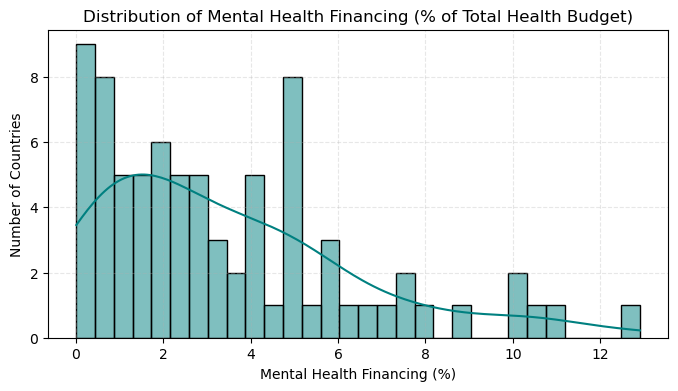

In [21]:
# Distribution plot of mental health financing percentage
plt.figure(figsize=(8, 4))
sns.histplot(financing_clean['MH_Financing_%'].dropna(), bins=30, kde=True, color='teal')
plt.title("Distribution of Mental Health Financing (% of Total Health Budget)")
plt.xlabel("Mental Health Financing (%)")
plt.ylabel("Number of Countries")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

This plot can be useful to better understand the distribution of mental health financing values across countries.

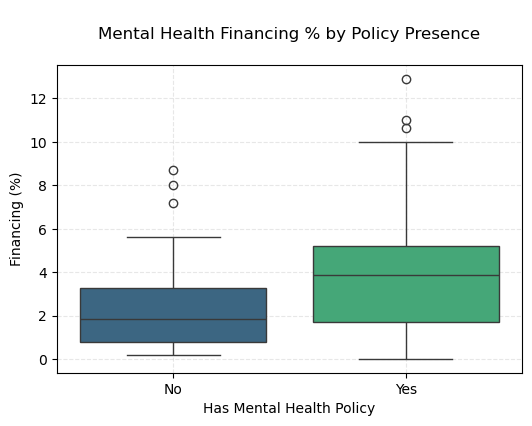

In [22]:
# Policy data with 'Code' and 'Year'
merged = pd.merge(financing_clean, policies_clean, on=['Code', 'Year'], how='inner')

# Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Has_MH_Policy', y='MH_Financing_%', data=merged, palette='viridis')
plt.title("\nMental Health Financing % by Policy Presence\n")
plt.xlabel("Has Mental Health Policy")
plt.ylabel("Financing (%)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

This plot can be used to know if countries with mental health policies tend to allocate a higher percentage of their health budget to mental health financing.

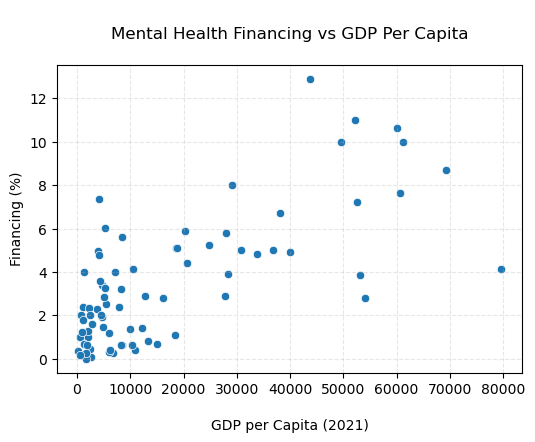

In [23]:
# Merge with GDP data
gdp_merge = gdp_clean[['Country Code', 'GDP_2021']].rename(columns={'Country Code': 'Code'})
merged2 = pd.merge(financing_clean, gdp_merge, on='Code', how='inner')

# Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='GDP_2021', y='MH_Financing_%', data=merged2)
plt.title("\nMental Health Financing vs GDP Per Capita\n")
plt.xlabel("\nGDP per Capita (2021)")
plt.ylabel("Financing (%)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

This plot can be used to identify if richer countries spend more on mental health.

In [24]:
# Mental Health Workforce — Raw Data
print("Mental Health Workforce (Raw Data):")
display(workforce_raw.head())

# Mental Health Workforce — After Basic Cleaning
print("\nMental Health Workforce (Cleaned):")
display(workforce_clean.head())

# Statistical summary of MH workforce per capita (per 100,000)
print("\nStatistical summary for Mental Health Workforce per capita:")
print(workforce_clean['MH_Workforce_per100k'].describe())

Mental Health Workforce (Raw Data):


,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,DisaggregatingDimension2,DisaggregatingDimension2ValueCode,...,DataSourceDimensionValueCode,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,20735555,MH_5,COUNTRY,ARM,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,19.5,19.5,NaN,NaN,NaN,2019-04-25T08:25:08Z,2016,2016-01-01,2016-12-31
1,20735556,MH_5,COUNTRY,ATG,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,8.0,8.0,NaN,NaN,NaN,2019-04-25T08:25:08Z,2016,2016-01-01,2016-12-31
2,20735557,MH_5,COUNTRY,AUS,YEAR,2015,NaN,NaN,NaN,NaN,...,NaN,7.8,7.8,NaN,NaN,NaN,2019-04-25T08:25:08Z,2015,2015-01-01,2015-12-31
3,20735558,MH_5,COUNTRY,AZE,YEAR,2016,NaN,NaN,NaN,NaN,...,NaN,3.5,3.5,NaN,NaN,NaN,2019-04-25T08:25:08Z,2016,2016-01-01,2016-12-31
4,20735559,MH_5,COUNTRY,BDI,YEAR,2017,NaN,NaN,NaN,NaN,...,NaN,0.2,0.2,NaN,NaN,NaN,2019-04-25T08:25:08Z,2017,2017-01-01,2017-12-31



Mental Health Workforce (Cleaned):


,Code,Year,MH_Workforce_per100k
0,ARM,2016,19.5
1,ATG,2016,8.0
2,AUS,2015,7.8
3,AZE,2016,3.5
4,BDI,2017,0.2



Statistical summary for Mental Health Workforce per capita:
count    78.000000
mean      3.717949
std       3.608854
min       0.000000
25%       1.100000
50%       2.700000
75%       5.525000
max      19.500000
Name: MH_Workforce_per100k, dtype: float64


In [25]:
# Merging policies, services, and legislation datasets on 'Code' and 'Year'

# Get unique 'Yes' entries for each component
pol_yes = policies_clean[policies_clean['Has_MH_Policy'].str.strip().str.capitalize() == 'Yes'][['Code', 'Year']]
pol_yes['Component'] = 'Policy'

ser_yes = services_clean[services_clean['Has_MH_Services'].str.strip().str.capitalize() == 'Yes'][['Code', 'Year']]
ser_yes['Component'] = 'Services'

leg_yes = legislation_clean[legislation_clean['Has_MH_Legislation'].str.strip().str.capitalize() == 'Yes'][['Code', 'Year']]
leg_yes['Component'] = 'Legislation'

# Combine all "Yes" entries
access_all = pd.concat([pol_yes, ser_yes, leg_yes], axis=0)

# Count how many unique components each country has
access_summary = access_all.groupby('Code')['Component'].nunique().reset_index()
access_summary = access_summary[access_summary['Component'] == 3]

# Get list of countries with all 3 components at any time
print("Countries that have had all 3 components (Policy, Services, Legislation) at some point:")
display(access_summary)

Countries that have had all 3 components (Policy, Services, Legislation) at some point:


,Code,Component
0,AFG,3
1,ALB,3
3,ARG,3
6,AUS,3
8,AZE,3
...,...,...
176,VUT,3
177,WSM,3
179,ZAF,3
180,ZMB,3


In [26]:
# OPTIONAL: Number of countries with all 3 components

# Filter "Yes" rows and get the earliest year for each component per country
policy_yes = policies_clean[policies_clean['Has_MH_Policy'].str.strip().str.capitalize() == 'Yes']
policy_year = policy_yes.groupby('Code')['Year'].min().reset_index().rename(columns={'Year': 'Policy_Year'})

services_yes = services_clean[services_clean['Has_MH_Services'].str.strip().str.capitalize() == 'Yes']
services_year = services_yes.groupby('Code')['Year'].min().reset_index().rename(columns={'Year': 'Services_Year'})

legislation_yes = legislation_clean[legislation_clean['Has_MH_Legislation'].str.strip().str.capitalize() == 'Yes']
legislation_year = legislation_yes.groupby('Code')['Year'].min().reset_index().rename(columns={'Year': 'Legislation_Year'})

# Merge all three
access_years = policy_year.merge(services_year, on='Code', how='inner') \
                          .merge(legislation_year, on='Code', how='inner')

# Merging in country names
access_years_named = access_years.merge(country_code_clean[['Code', 'Title']], on='Code', how='left')

# Reordering for readability
access_years_named = access_years_named[['Code', 'Title', 'Policy_Year', 'Services_Year', 'Legislation_Year']]

# Renaming columns for easier understanding
access_years_named = access_years_named.rename(columns={
    'Code': 'Country_Code',
    'Title': 'Country_Name'
})[
    ['Country_Name', 'Country_Code', 'Policy_Year', 'Services_Year', 'Legislation_Year']
]

# Display the final output
print("Countries with All 3 Access Components + First 'Yes' Year for Each:")
display(access_years_named.sort_values('Country_Name'))

Countries with All 3 Access Components + First 'Yes' Year for Each:


,Country_Name,Country_Code,Policy_Year,Services_Year,Legislation_Year
0,Afghanistan,AFG,2011,2014,2014
1,Albania,ALB,2011,2014,2014
16,Algeria,DZA,2011,2014,2014
2,Argentina,ARG,2011,2014,2014
3,Australia,AUS,2011,2014,2014
...,...,...,...,...,...
70,United Republic of Tanzania,TZA,2011,2014,2015
71,Uzbekistan,UZB,2011,2014,2014
72,Vanuatu,VUT,2011,2016,2016
75,Zambia,ZMB,2011,2014,2014


This table shows countries that have had a mental health policy, service, and legislation with the earliest year each was first recorded as “Yes.” 

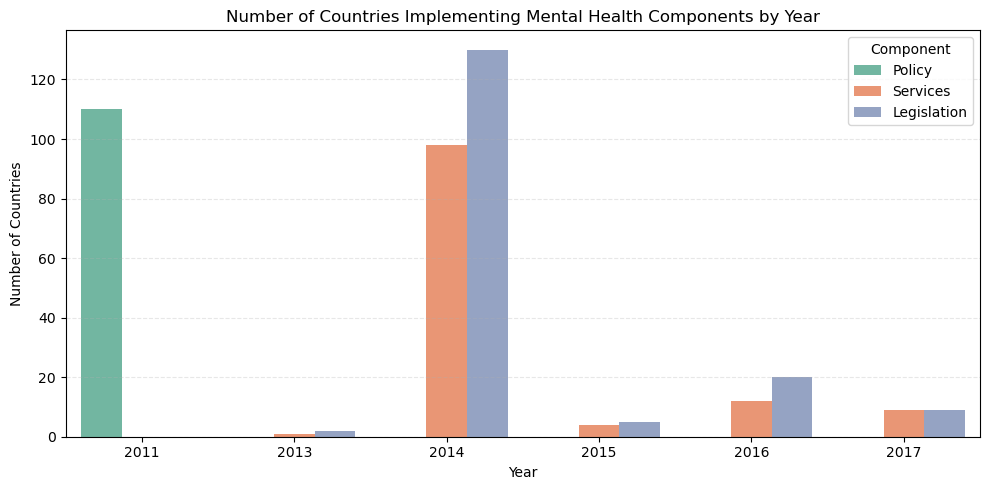

In [27]:
# Component-wise year counts
policy_count = policy_year.groupby('Policy_Year').size().reset_index(name='Countries')
policy_count['Component'] = 'Policy'

services_count = services_year.groupby('Services_Year').size().reset_index(name='Countries')
services_count['Component'] = 'Services'

legislation_count = legislation_year.groupby('Legislation_Year').size().reset_index(name='Countries')
legislation_count['Component'] = 'Legislation'

# Renaming columns for merging
policy_count = policy_count.rename(columns={'Policy_Year': 'Year'})
services_count = services_count.rename(columns={'Services_Year': 'Year'})
legislation_count = legislation_count.rename(columns={'Legislation_Year': 'Year'})

# Combine all
access_plot_data = pd.concat([policy_count, services_count, legislation_count])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='Countries', hue='Component', data=access_plot_data, palette='Set2')
plt.title("Number of Countries Implementing Mental Health Components by Year")
plt.xlabel("Year")
plt.ylabel("Number of Countries")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Component")
plt.tight_layout()
plt.show()

Comment:

- "Policy" has the highest adoption, followed by "Services" and then "Legislation", suggesting that while many countries recognize mental health in policies, actual services and legal frameworks lag behind.
- The absence of 2012 data may indicate no records were collected that year.

In [28]:
# General Health System Score — Raw Data
print("General Health System Score (Raw Data):")
display(general_health_raw.head())

# General Health System Score — After Basic Cleaning
print("\nGeneral Health System Score (Cleaned):")
display(general_health_clean.head())

# Statistical summary of health system score
print("\nStatistical summary for Health System Score:")
print(general_health_clean['HealthSystem_Score'].describe())

General Health System Score (Raw Data):


,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,DisaggregatingDimension2,DisaggregatingDimension2ValueCode,...,DataSourceDimensionValueCode,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,25880941,IHR07,COUNTRY,LTU,YEAR,2017,NaN,NaN,NaN,NaN,...,NaN,0,0,NaN,NaN,NaN,2021-06-14T10:35:11Z,2017,2017-01-01,2017-12-31
1,25880954,IHR07,COUNTRY,LUX,YEAR,2017,NaN,NaN,NaN,NaN,...,NaN,40,40,NaN,NaN,NaN,2021-06-14T10:35:11Z,2017,2017-01-01,2017-12-31
2,25880967,IHR07,COUNTRY,MDG,YEAR,2017,NaN,NaN,NaN,NaN,...,NaN,40,40,NaN,NaN,NaN,2021-06-14T10:35:11Z,2017,2017-01-01,2017-12-31
3,25880980,IHR07,COUNTRY,MWI,YEAR,2017,NaN,NaN,NaN,NaN,...,NaN,100,100,NaN,NaN,NaN,2021-06-14T10:35:12Z,2017,2017-01-01,2017-12-31
4,25880993,IHR07,COUNTRY,MDV,YEAR,2017,NaN,NaN,NaN,NaN,...,NaN,40,40,NaN,NaN,NaN,2021-06-14T10:35:12Z,2017,2017-01-01,2017-12-31



General Health System Score (Cleaned):


,Code,Year,HealthSystem_Score
0,LTU,2017,0
1,LUX,2017,40
2,MDG,2017,40
3,MWI,2017,100
4,MDV,2017,40



Statistical summary for Health System Score:
count    1212.000000
mean       56.636964
std        34.471811
min         0.000000
25%        25.000000
50%        60.000000
75%       100.000000
max       100.000000
Name: HealthSystem_Score, dtype: float64


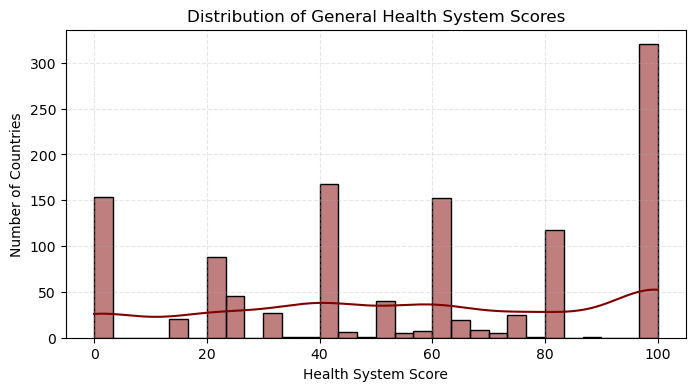

In [29]:
# OPTIONAL: Plot showing distribution of general health system scores
plt.figure(figsize=(8, 4))
sns.histplot(general_health_clean['HealthSystem_Score'].dropna(), bins=30, kde=True, color='maroon')
plt.title("Distribution of General Health System Scores")
plt.xlabel("Health System Score")
plt.ylabel("Number of Countries")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Comment:
- Global health systems are moderately performing on average.
- The skew highlights *inequality*, meaning, a few high-performing nations contrast with many mid- or lower-tier systems.

In [30]:
# Anxiety Disorder — Raw Data
print("Anxiety Disorder (Raw Data):")
display(anxiety_raw.head())

# Anxiety Disorder — After Basic Cleaning
print("\nAnxiety Disorder (Cleaned):")
display(anxiety_clean.head())

Anxiety Disorder (Raw Data):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),France,Male,<5 years,Anxiety disorders,Rate,2019,18.133133,33.231599,7.168469
1,DALYs (Disability-Adjusted Life Years),France,Female,<5 years,Anxiety disorders,Rate,2019,39.170861,70.237705,17.874491
2,DALYs (Disability-Adjusted Life Years),France,Male,0-6 days,Anxiety disorders,Rate,2019,0.000000,0.000000,0.000000
3,DALYs (Disability-Adjusted Life Years),France,Female,0-6 days,Anxiety disorders,Rate,2019,0.000000,0.000000,0.000000
4,DALYs (Disability-Adjusted Life Years),France,Male,7-27 days,Anxiety disorders,Rate,2019,0.000000,0.000000,0.000000



Anxiety Disorder (Cleaned):


,Country,Year,Measure,Sex,Age_Group,Anxiety_Rate
0,France,2019,DALYs,Male,<5 years,18.133133
1,France,2019,DALYs,Female,<5 years,39.170861
2,France,2019,DALYs,Male,0-6 days,0.000000
3,France,2019,DALYs,Female,0-6 days,0.000000
4,France,2019,DALYs,Male,7-27 days,0.000000


In [31]:
print("Years:", anxiety_clean['Year'].unique())
print("Countries:", anxiety_clean['Country'].nunique())
print("Measures:", anxiety_clean['Measure'].unique())
print("Number of Age Groups:", anxiety_clean['Age_Group'].nunique())

Years: [2019 2021 2020]
Countries: 204
Measures: ['DALYs' 'Prevalence']
Number of Age Groups: 49


In [32]:
# Filtering for DALYs only and 2020 data
anxiety_filtered = anxiety_clean[
    (anxiety_clean['Measure'] == 'DALYs') &
    (anxiety_clean['Year'] == 2020)
]

# Preview
print("Filtered Anxiety Dataset:")
display(anxiety_filtered.head())

Filtered Anxiety Dataset:


,Country,Year,Measure,Sex,Age_Group,Anxiety_Rate
208,Solomon Islands,2020,DALYs,Male,<5 years,11.119595
209,Solomon Islands,2020,DALYs,Female,<5 years,16.697299
210,Solomon Islands,2020,DALYs,Male,0-6 days,0.000000
211,Solomon Islands,2020,DALYs,Female,0-6 days,0.000000
212,Solomon Islands,2020,DALYs,Male,7-27 days,0.000000


In [33]:
# Anxiety — Measure type counts
print("Anxiety Disorder: Count of DALYs vs Prevalence")
print(anxiety_clean['Measure'].value_counts())

Anxiety Disorder: Count of DALYs vs Prevalence
Measure
DALYs         59976
Prevalence    59976
Name: count, dtype: int64


In [34]:
# Anxiety Disorder data for DALYs in the year 2020
anxiety_filtered = anxiety_clean[
    (anxiety_clean['Measure'] == 'DALYs') &
    (anxiety_clean['Year'] == 2020)
]

# Preview the filtered dataset
print("Anxiety Dataset — Filtered (DALYs, 2020):")
display(anxiety_filtered.head())

Anxiety Dataset — Filtered (DALYs, 2020):


,Country,Year,Measure,Sex,Age_Group,Anxiety_Rate
208,Solomon Islands,2020,DALYs,Male,<5 years,11.119595
209,Solomon Islands,2020,DALYs,Female,<5 years,16.697299
210,Solomon Islands,2020,DALYs,Male,0-6 days,0.000000
211,Solomon Islands,2020,DALYs,Female,0-6 days,0.000000
212,Solomon Islands,2020,DALYs,Male,7-27 days,0.000000


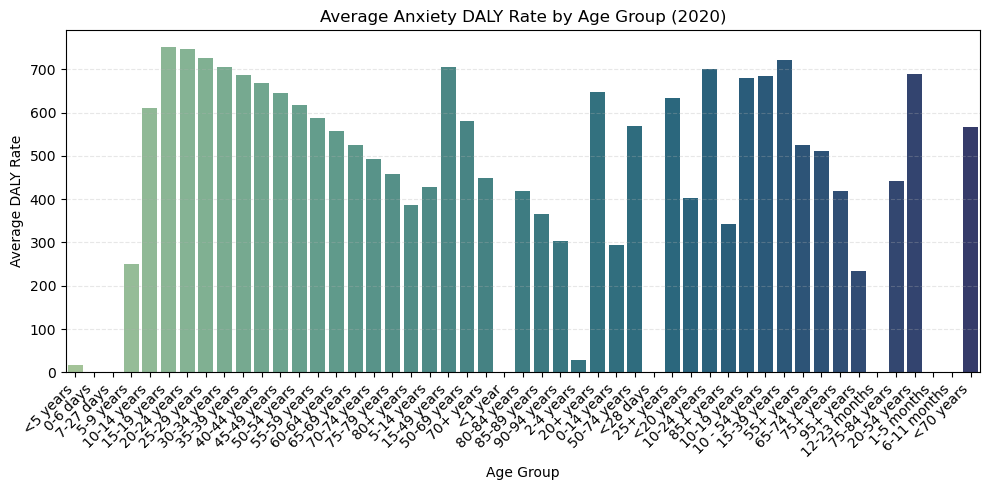

In [35]:
# Average DALY rate for anxiety by age group
plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Group', y='Anxiety_Rate', data=anxiety_filtered, estimator='mean', ci=None, palette='crest')
plt.title("Average Anxiety DALY Rate by Age Group (2020)")
plt.xlabel("Age Group")
plt.ylabel("Average DALY Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

- This plot shows the average disability-adjusted life year (DALY) rates for anxiety disorders across different age groups. 
- It helps identify which age segments are most affected in the year 2020 (COVID-19).

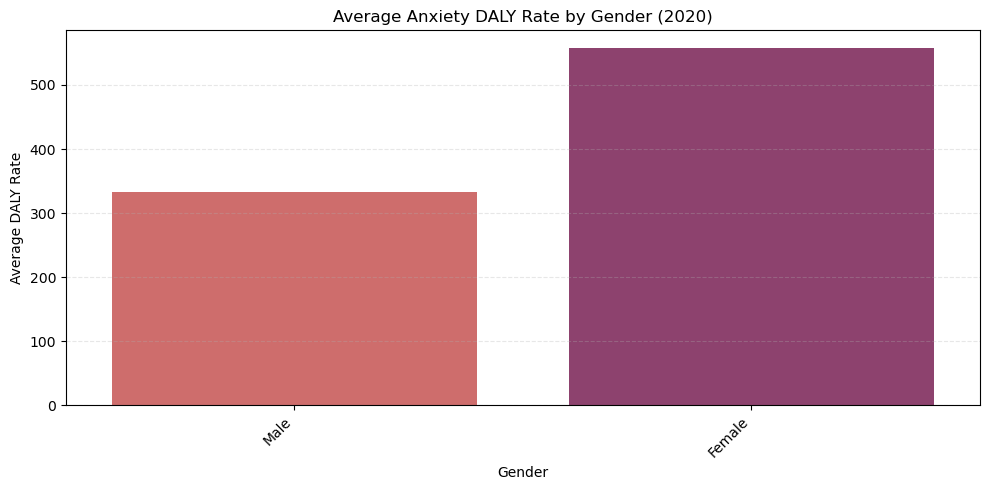

In [36]:
# Average DALY rate for anxiety by Gender
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Anxiety_Rate', data=anxiety_filtered, estimator='mean', ci=None, palette='flare')
plt.title("Average Anxiety DALY Rate by Gender (2020)")
plt.xlabel("Gender")
plt.ylabel("Average DALY Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [37]:
# Filtering Anxiety Disorder data for Prevalence in the year 2020
anxiety_prev = anxiety_clean[
    (anxiety_clean['Measure'] == 'Prevalence') &
    (anxiety_clean['Year'] == 2020)
]
print("Anxiety Dataset — Filtered (Prevalence, 2020):")
display(anxiety_prev.head())

Anxiety Dataset — Filtered (Prevalence, 2020):


,Country,Year,Measure,Sex,Age_Group,Anxiety_Rate
59978,China,2020,Prevalence,Male,65-74 years,3392.155012
59979,China,2020,Prevalence,Female,65-74 years,5057.396727
59984,China,2020,Prevalence,Male,75+ years,3456.882524
59985,China,2020,Prevalence,Female,75+ years,5298.740625
59990,China,2020,Prevalence,Male,95+ years,1999.486735


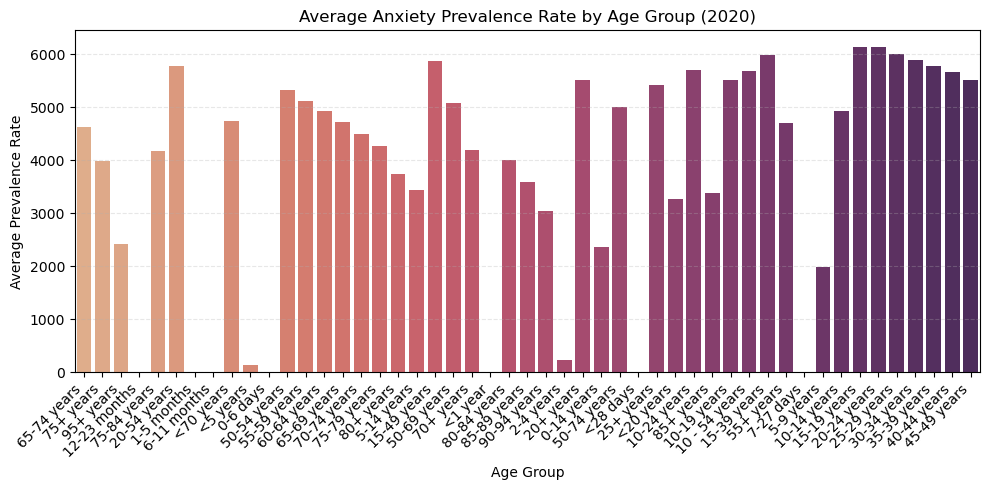

In [38]:
# Average Prevalence rate for anxiety by age group
plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Group', y='Anxiety_Rate', data=anxiety_prev, estimator='mean', ci=None, palette='flare')
plt.title("Average Anxiety Prevalence Rate by Age Group (2020)")
plt.xlabel("Age Group")
plt.ylabel("Average Prevalence Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

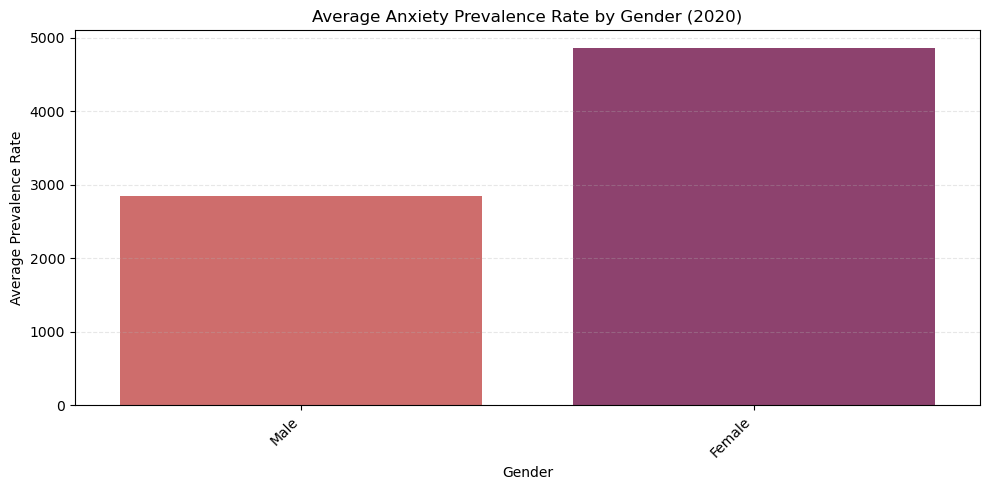

In [39]:
# Average Prevalence rate for anxiety by Gender
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Anxiety_Rate', data=anxiety_prev, estimator='mean', ci=None, palette='flare')
plt.title("Average Anxiety Prevalence Rate by Gender (2020)")
plt.xlabel("Gender")
plt.ylabel("Average Prevalence Rate")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
# Filtering only 2020 data and relevant measures for both plots
anxiety_2020 = anxiety_clean[
    (anxiety_clean['Year'] == 2020) &
    (anxiety_clean['Measure'].isin(['DALYs', 'Prevalence']))
]
print("Anxiety Dataset — Filtered (2020, DALYs and Prevalence):")
display(anxiety_2020.head())

Anxiety Dataset — Filtered (2020, DALYs and Prevalence):


,Country,Year,Measure,Sex,Age_Group,Anxiety_Rate
208,Solomon Islands,2020,DALYs,Male,<5 years,11.119595
209,Solomon Islands,2020,DALYs,Female,<5 years,16.697299
210,Solomon Islands,2020,DALYs,Male,0-6 days,0.000000
211,Solomon Islands,2020,DALYs,Female,0-6 days,0.000000
212,Solomon Islands,2020,DALYs,Male,7-27 days,0.000000


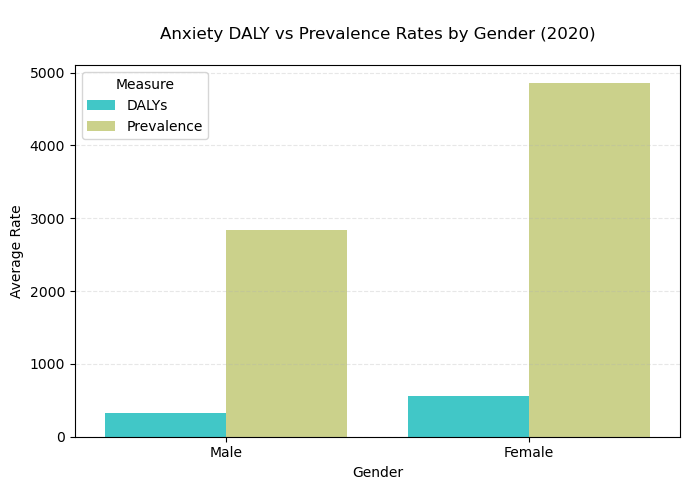

In [41]:
# DALY and Prevalence comparison by gender
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Anxiety_Rate', hue='Measure', data=anxiety_2020, estimator='mean', ci=None, palette='rainbow')
plt.title("\nAnxiety DALY vs Prevalence Rates by Gender (2020)\n")
plt.xlabel("Gender")
plt.ylabel("Average Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Measure")
plt.tight_layout()
plt.show()

In [42]:
# Bipolar Disorder — Raw Data
print("Bipolar Disorder (Raw Data):")
display(bipolar_raw.head())

# Bipolar Disorder — After Basic Cleaning
print("\nBipolar Disorder (Cleaned):")
display(bipolar_clean.head())

Bipolar Disorder (Raw Data):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Male,<5 years,Bipolar disorder,Rate,2019,0.0,0.0,0.0
1,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Female,<5 years,Bipolar disorder,Rate,2019,0.0,0.0,0.0
2,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Male,0-6 days,Bipolar disorder,Rate,2019,0.0,0.0,0.0
3,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Female,0-6 days,Bipolar disorder,Rate,2019,0.0,0.0,0.0
4,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Male,7-27 days,Bipolar disorder,Rate,2019,0.0,0.0,0.0



Bipolar Disorder (Cleaned):


,Country,Year,Measure,Sex,Age_Group,BipolarDisorder_Rate
0,Papua New Guinea,2019,DALYs,Male,<5 years,0.0
1,Papua New Guinea,2019,DALYs,Female,<5 years,0.0
2,Papua New Guinea,2019,DALYs,Male,0-6 days,0.0
3,Papua New Guinea,2019,DALYs,Female,0-6 days,0.0
4,Papua New Guinea,2019,DALYs,Male,7-27 days,0.0


In [43]:
# Filtering for DALYs only in 2020
bipolar_daly_2020 = bipolar_clean[
    (bipolar_clean['Measure'] == 'DALYs')& 
    (bipolar_clean['Year'] == 2020)
]

# Filtering for Prevalence only in 2020
bipolar_prev_2020 = bipolar_clean[
    (bipolar_clean['Measure'] == 'Prevalence') &
    (bipolar_clean['Year'] == 2020)
]

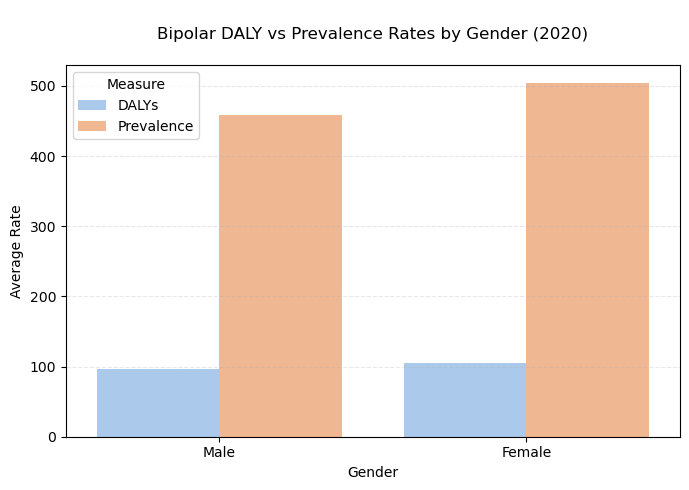

In [44]:
# Preparing combined bipolar dataset for 2020
bipolar_2020 = bipolar_clean[
    (bipolar_clean['Year'] == 2020) &
    (bipolar_clean['Measure'].isin(['DALYs', 'Prevalence']))
]

# DALY vs Prevalence by gender plot
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='BipolarDisorder_Rate', hue='Measure', data=bipolar_2020, estimator='mean', ci=None, palette='pastel')
plt.title("\nBipolar DALY vs Prevalence Rates by Gender (2020)\n")
plt.xlabel("Gender")
plt.ylabel("Average Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Measure")
plt.tight_layout()
plt.show()

In [45]:
# Depression Disorder — Raw Data
print("Depression Disorder (Raw Data):")
display(depression_raw.head())

# Depression Disorder — After Basic Cleaning
print("\nDepression Disorder (Cleaned):")
display(depression_clean.head())

Depression Disorder (Raw Data):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),Solomon Islands,Male,<5 years,Depressive disorders,Rate,2019,0.161758,0.315279,0.067100
1,DALYs (Disability-Adjusted Life Years),Solomon Islands,Female,<5 years,Depressive disorders,Rate,2019,0.194132,0.372962,0.081035
2,DALYs (Disability-Adjusted Life Years),Solomon Islands,Male,0-6 days,Depressive disorders,Rate,2019,0.000000,0.000000,0.000000
3,DALYs (Disability-Adjusted Life Years),Solomon Islands,Female,0-6 days,Depressive disorders,Rate,2019,0.000000,0.000000,0.000000
4,DALYs (Disability-Adjusted Life Years),Solomon Islands,Male,7-27 days,Depressive disorders,Rate,2019,0.000000,0.000000,0.000000



Depression Disorder (Cleaned):


,Country,Year,Measure,Sex,Age_Group,Depression_Rate
0,Solomon Islands,2019,DALYs,Male,<5 years,0.161758
1,Solomon Islands,2019,DALYs,Female,<5 years,0.194132
2,Solomon Islands,2019,DALYs,Male,0-6 days,0.000000
3,Solomon Islands,2019,DALYs,Female,0-6 days,0.000000
4,Solomon Islands,2019,DALYs,Male,7-27 days,0.000000


In [46]:
# Filtering for DALYs only in 2020
depression_daly_2020 = depression_clean[
    (depression_clean['Measure'] == 'DALYs')& 
    (depression_clean['Year'] == 2020)
]

# Filtering for Prevalence only in 2020
depression_prev_2020 = depression_clean[
    (depression_clean['Measure'] == 'Prevalence') &
    (depression_clean['Year'] == 2020)
]

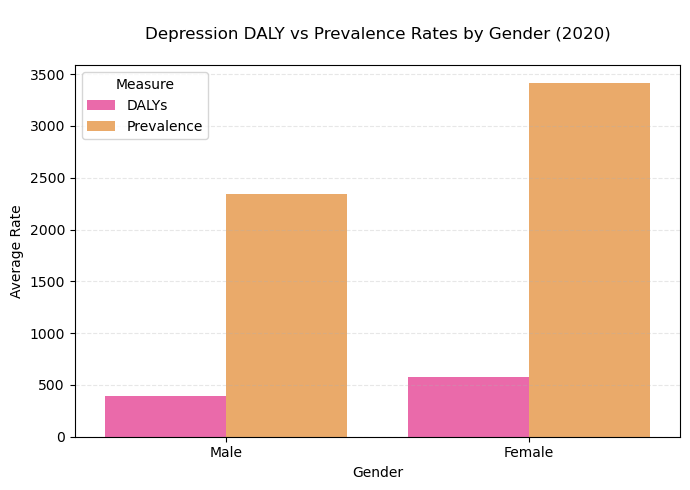

In [47]:
depression_2020 = pd.concat([depression_daly_2020, depression_prev_2020], axis=0)

# DALY vs Prevalence for Depression by Gender
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Depression_Rate', hue='Measure', data=depression_2020, estimator='mean', ci=None, palette='spring')
plt.title("\nDepression DALY vs Prevalence Rates by Gender (2020)\n")
plt.xlabel("Gender")
plt.ylabel("Average Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Measure")
plt.tight_layout()
plt.show()

In [48]:
# Eating Disorders — Raw Data
print("Eating Disorders (Raw Data):")
display(eating_disorders_raw.head())

# Eating Disorders — After Basic Cleaning
print("\nEating Disorders (Cleaned):")
display(eating_disorders_clean.head())

Eating Disorders (Raw Data):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Comoros,Male,5-9 years,Eating disorders,Rate,2019,1.459864e-06,0.000002,7.504105e-08
1,Deaths,Comoros,Female,5-9 years,Eating disorders,Rate,2019,2.437709e-07,0.000001,1.249853e-07
2,Deaths,Comoros,Male,10-14 years,Eating disorders,Rate,2019,2.011334e-06,0.000005,2.708406e-07
3,Deaths,Comoros,Female,10-14 years,Eating disorders,Rate,2019,4.875481e-06,0.000017,5.810773e-07
4,Deaths,Comoros,Male,15-19 years,Eating disorders,Rate,2019,1.398148e-05,0.000025,1.365665e-06



Eating Disorders (Cleaned):


,Country,Year,Measure,Sex,Age_Group,EatingDisorder_Rate
0,Comoros,2019,Deaths,Male,5-9 years,1.459864e-06
1,Comoros,2019,Deaths,Female,5-9 years,2.437709e-07
2,Comoros,2019,Deaths,Male,10-14 years,2.011334e-06
3,Comoros,2019,Deaths,Female,10-14 years,4.875481e-06
4,Comoros,2019,Deaths,Male,15-19 years,1.398148e-05


In [49]:
# Eating Disorders — Raw Data
print("Eating Disorders (Raw Data):")
display(eating_disorders_raw.head())

# Eating Disorders — After Basic Cleaning
print("\nEating Disorders (Cleaned):")
display(eating_disorders_clean.head())

Eating Disorders (Raw Data):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Comoros,Male,5-9 years,Eating disorders,Rate,2019,1.459864e-06,0.000002,7.504105e-08
1,Deaths,Comoros,Female,5-9 years,Eating disorders,Rate,2019,2.437709e-07,0.000001,1.249853e-07
2,Deaths,Comoros,Male,10-14 years,Eating disorders,Rate,2019,2.011334e-06,0.000005,2.708406e-07
3,Deaths,Comoros,Female,10-14 years,Eating disorders,Rate,2019,4.875481e-06,0.000017,5.810773e-07
4,Deaths,Comoros,Male,15-19 years,Eating disorders,Rate,2019,1.398148e-05,0.000025,1.365665e-06



Eating Disorders (Cleaned):


,Country,Year,Measure,Sex,Age_Group,EatingDisorder_Rate
0,Comoros,2019,Deaths,Male,5-9 years,1.459864e-06
1,Comoros,2019,Deaths,Female,5-9 years,2.437709e-07
2,Comoros,2019,Deaths,Male,10-14 years,2.011334e-06
3,Comoros,2019,Deaths,Female,10-14 years,4.875481e-06
4,Comoros,2019,Deaths,Male,15-19 years,1.398148e-05


In [50]:
# Filtering for DALYs only in 2020
eating_dis_daly_2020 = eating_disorders_clean[
    (eating_disorders_clean['Measure'] == 'DALYs') &
    (eating_disorders_clean['Year'] == 2020)
]

# Filtering for Prevalence only in 2020
eating_dis_prev_2020 = eating_disorders_clean[
    (eating_disorders_clean['Measure'] == 'Prevalence') &
    (eating_disorders_clean['Year'] == 2020)
]

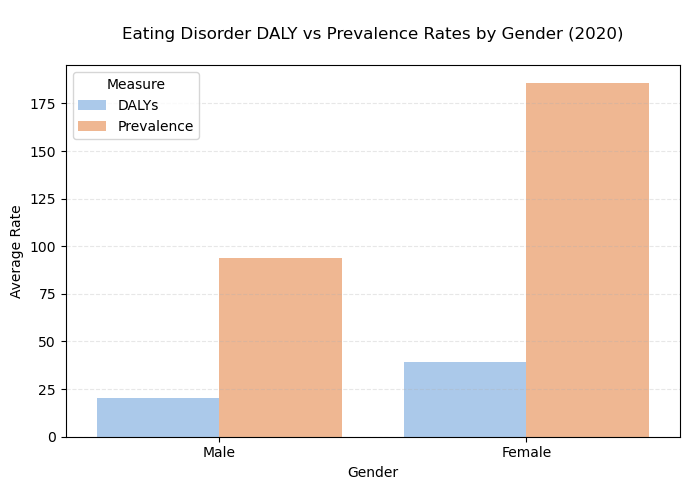

In [51]:
# Combine both filtered sets for plotting
eating_dis_2020 = pd.concat([eating_dis_daly_2020, eating_dis_prev_2020], axis=0)

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='EatingDisorder_Rate', hue='Measure', data=eating_dis_2020, estimator='mean', ci=None, palette='pastel')
plt.title("\nEating Disorder DALY vs Prevalence Rates by Gender (2020)\n")
plt.xlabel("Gender")
plt.ylabel("Average Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Measure")
plt.tight_layout()
plt.show()

In [52]:
# Schizophrenia — Raw Data
print("Schizophrenia Disorder (Raw Data):")
display(schizophrenia_raw.head())

# Schizophrenia — After Basic Cleaning
print("\nSchizophrenia Disorder (Cleaned):")
display(schizophrenia_clean.head())

Schizophrenia Disorder (Raw Data):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Male,<5 years,Schizophrenia,Rate,2019,0.0,0.0,0.0
1,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Female,<5 years,Schizophrenia,Rate,2019,0.0,0.0,0.0
2,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Male,0-6 days,Schizophrenia,Rate,2019,0.0,0.0,0.0
3,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Female,0-6 days,Schizophrenia,Rate,2019,0.0,0.0,0.0
4,DALYs (Disability-Adjusted Life Years),Papua New Guinea,Male,7-27 days,Schizophrenia,Rate,2019,0.0,0.0,0.0



Schizophrenia Disorder (Cleaned):


,Country,Year,Measure,Sex,Age_Group,Schizophrenia_Rate
0,Papua New Guinea,2019,DALYs,Male,<5 years,0.0
1,Papua New Guinea,2019,DALYs,Female,<5 years,0.0
2,Papua New Guinea,2019,DALYs,Male,0-6 days,0.0
3,Papua New Guinea,2019,DALYs,Female,0-6 days,0.0
4,Papua New Guinea,2019,DALYs,Male,7-27 days,0.0


In [53]:
# Filtering for DALYs only in 2020
schizo_daly_2020 = schizophrenia_clean[
    (schizophrenia_clean['Measure'] == 'DALYs') & 
    (schizophrenia_clean['Year'] == 2020)
]

# Filtering for Prevalence only in 2020
schizo_prev_2020 = schizophrenia_clean[
    (schizophrenia_clean['Measure'] == 'Prevalence') & 
    (schizophrenia_clean['Year'] == 2020)
]

# Combine both for plotting
schizo_2020 = pd.concat([schizo_daly_2020, schizo_prev_2020], axis=0)

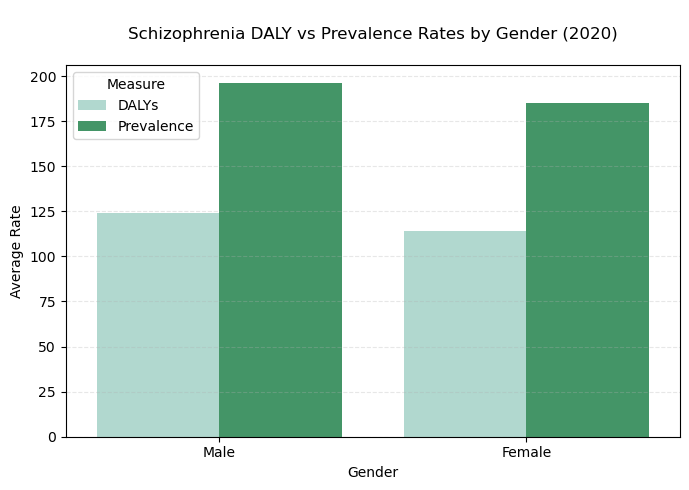

In [54]:
# Plotting DALY vs Prevalence for Schizophrenia by gender
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Schizophrenia_Rate', hue='Measure', data=schizo_2020, estimator='mean', ci=None, palette='BuGn')
plt.title("\nSchizophrenia DALY vs Prevalence Rates by Gender (2020)\n")
plt.xlabel("Gender")
plt.ylabel("Average Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Measure")
plt.tight_layout()
plt.show()

In [55]:
# Self-Harm — Raw Data
print("Self-Harm (Raw Data):")
display(self_harm_raw.head())

# Self-Harm — After Basic Cleaning
print("\nSelf-Harm (Cleaned):")
display(self_harm_clean.head())

Self-Harm (Raw Data):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Fiji,Male,10-14 years,Self-harm,Rate,2021,2.974103,4.942560,1.610336
1,Deaths,Fiji,Female,10-14 years,Self-harm,Rate,2021,1.962214,3.256724,1.113896
2,Deaths,Fiji,Male,15-19 years,Self-harm,Rate,2021,14.294907,20.923218,8.688593
3,Deaths,Fiji,Female,15-19 years,Self-harm,Rate,2021,13.852333,20.250474,8.634415
4,Deaths,Fiji,Male,20-24 years,Self-harm,Rate,2021,26.878882,40.088745,17.399566



Self-Harm (Cleaned):


,Country,Year,Measure,Sex,Age_Group,SelfHarm_Rate
0,Fiji,2021,Deaths,Male,10-14 years,2.974103
1,Fiji,2021,Deaths,Female,10-14 years,1.962214
2,Fiji,2021,Deaths,Male,15-19 years,14.294907
3,Fiji,2021,Deaths,Female,15-19 years,13.852333
4,Fiji,2021,Deaths,Male,20-24 years,26.878882


In [56]:
# Filtering for DALYs only in 2020
selfharm_daly_2020 = self_harm_clean[
    (self_harm_clean['Measure'] == 'DALYs') & 
    (self_harm_clean['Year'] == 2020)
]

# Filtering for Prevalence only in 2020
selfharm_prev_2020 = self_harm_clean[
    (self_harm_clean['Measure'] == 'Prevalence') & 
    (self_harm_clean['Year'] == 2020)
]

# Combine both for plotting
selfharm_2020 = pd.concat([selfharm_daly_2020, selfharm_prev_2020], axis=0)

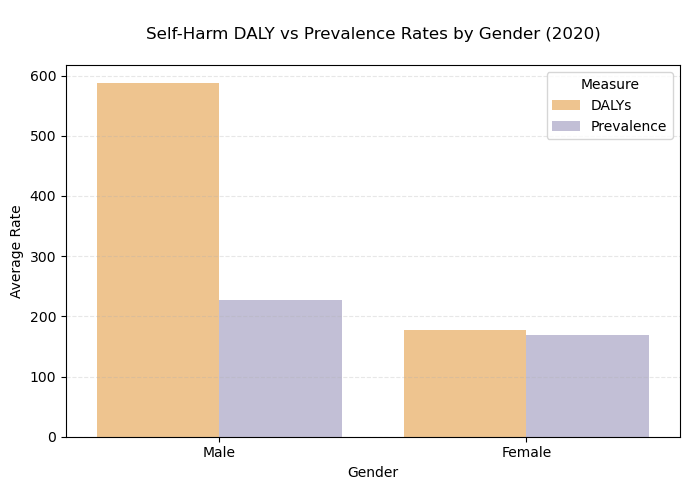

In [57]:
# Plotting DALY vs Prevalence for Self-Harm by gender
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='SelfHarm_Rate', hue='Measure', data=selfharm_2020, estimator='mean', ci=None, palette='PuOr')
plt.title("\nSelf-Harm DALY vs Prevalence Rates by Gender (2020)\n")
plt.xlabel("Gender")
plt.ylabel("Average Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Measure")
plt.tight_layout()
plt.show()

In [58]:
# Alcohol Use — Raw Data
print("Alcohol Use Disorder (Raw Data):")
display(alcohol_use_raw.head())

# Alcohol Use — After Basic Cleaning
print("\nAlcohol Use Disorder (Cleaned):")
display(alcohol_use_clean.head())

Alcohol Use Disorder (Raw Data):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Comoros,Male,<5 years,Alcohol use disorders,Rate,2019,0.0,0.0,0.0
1,Deaths,Comoros,Female,<5 years,Alcohol use disorders,Rate,2019,0.0,0.0,0.0
2,Deaths,Comoros,Male,0-6 days,Alcohol use disorders,Rate,2019,0.0,0.0,0.0
3,Deaths,Comoros,Female,0-6 days,Alcohol use disorders,Rate,2019,0.0,0.0,0.0
4,Deaths,Comoros,Male,7-27 days,Alcohol use disorders,Rate,2019,0.0,0.0,0.0



Alcohol Use Disorder (Cleaned):


,Country,Year,Measure,Sex,Age_Group,AlcoholUse_Rate
0,Comoros,2019,Deaths,Male,<5 years,0.0
1,Comoros,2019,Deaths,Female,<5 years,0.0
2,Comoros,2019,Deaths,Male,0-6 days,0.0
3,Comoros,2019,Deaths,Female,0-6 days,0.0
4,Comoros,2019,Deaths,Male,7-27 days,0.0


In [59]:
# Filtering for DALYs only in 2020
alcohol_daly_2020 = alcohol_use_clean[
    (alcohol_use_clean['Measure'] == 'DALYs') & 
    (alcohol_use_clean['Year'] == 2020)
]

# Filtering for Prevalence only in 2020
alcohol_prev_2020 = alcohol_use_clean[
    (alcohol_use_clean['Measure'] == 'Prevalence') & 
    (alcohol_use_clean['Year'] == 2020)
]

# Combine both for plotting
alcohol_2020 = pd.concat([alcohol_daly_2020, alcohol_prev_2020], axis=0)

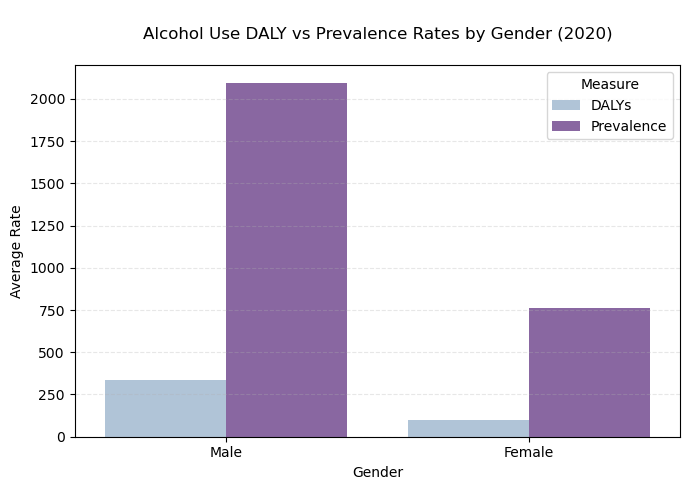

In [60]:
# Plot for Alcohol Use Disorder DALY vs Prevalence
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='AlcoholUse_Rate', hue='Measure', data=alcohol_2020, estimator='mean', ci=None, palette='BuPu')
plt.title("\nAlcohol Use DALY vs Prevalence Rates by Gender (2020)\n")
plt.xlabel("Gender")
plt.ylabel("Average Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Measure")
plt.tight_layout()
plt.show()

In [61]:
# Drug Use — Raw Data File 1
print("Drug Use Disorder (Raw Data File 1):")
display(drug_use_raw1.head())

# Drug Use — Raw Data File 2
print("\nDrug Use Disorder (Raw Data File 2):")
display(drug_use_raw2.head())

# Drug Use — After Cleaning and Merging
print("\nDrug Use Disorder (Cleaned Combined File):")
display(drug_use_clean.head())

Drug Use Disorder (Raw Data File 1):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,Deaths,Trinidad and Tobago,Male,<5 years,Drug use disorders,Rate,2021,0.0,0.0,0.0
1,Deaths,Trinidad and Tobago,Female,<5 years,Drug use disorders,Rate,2021,0.0,0.0,0.0
2,Deaths,Trinidad and Tobago,Male,0-6 days,Drug use disorders,Rate,2021,0.0,0.0,0.0
3,Deaths,Trinidad and Tobago,Female,0-6 days,Drug use disorders,Rate,2021,0.0,0.0,0.0
4,Deaths,Trinidad and Tobago,Male,7-27 days,Drug use disorders,Rate,2021,0.0,0.0,0.0



Drug Use Disorder (Raw Data File 2):


,measure,location,sex,age,cause,metric,year,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),Czechia,Female,20-54 years,Amphetamine use disorders,Rate,2021,37.212714,57.09512,21.393274
1,DALYs (Disability-Adjusted Life Years),Czechia,Male,1-5 months,Amphetamine use disorders,Rate,2021,0.000000,0.00000,0.000000
2,DALYs (Disability-Adjusted Life Years),Czechia,Female,1-5 months,Amphetamine use disorders,Rate,2021,0.000000,0.00000,0.000000
3,DALYs (Disability-Adjusted Life Years),Czechia,Male,6-11 months,Amphetamine use disorders,Rate,2021,0.000000,0.00000,0.000000
4,DALYs (Disability-Adjusted Life Years),Czechia,Female,6-11 months,Amphetamine use disorders,Rate,2021,0.000000,0.00000,0.000000



Drug Use Disorder (Cleaned Combined File):


,Country,Year,Measure,Sex,Age_Group,Drug_Type,DrugUse_Rate
0,Trinidad and Tobago,2021,Deaths,Male,<5 years,Drug use disorders,0.0
1,Trinidad and Tobago,2021,Deaths,Female,<5 years,Drug use disorders,0.0
2,Trinidad and Tobago,2021,Deaths,Male,0-6 days,Drug use disorders,0.0
3,Trinidad and Tobago,2021,Deaths,Female,0-6 days,Drug use disorders,0.0
4,Trinidad and Tobago,2021,Deaths,Male,7-27 days,Drug use disorders,0.0


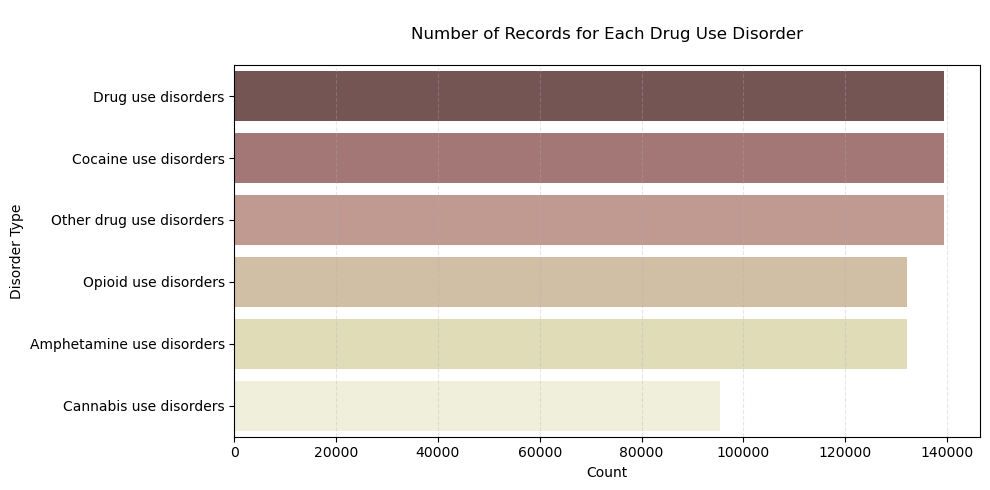

In [157]:
# Count plot for different drug use disorder types (e.g., Opioid, Cocaine, Cannabis)
plt.figure(figsize=(10, 5))
sns.countplot(y='Drug_Type', data=drug_use_clean, order=drug_use_clean['Drug_Type'].value_counts().index, palette='pink')
plt.title("\nNumber of Records for Each Drug Use Disorder\n")
plt.xlabel("Count")
plt.ylabel("Disorder Type")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [63]:
# Filtering for DALYs only in 2020
drug_daly_2020 = drug_use_clean[
    (drug_use_clean['Measure'] == 'DALYs') & 
    (drug_use_clean['Year'] == 2020)
]

# Filtering for Prevalence only in 2020
drug_prev_2020 = drug_use_clean[
    (drug_use_clean['Measure'] == 'Prevalence') & 
    (drug_use_clean['Year'] == 2020)
]

# Combine both for plotting
drug_2020 = pd.concat([drug_daly_2020, drug_prev_2020], axis=0)

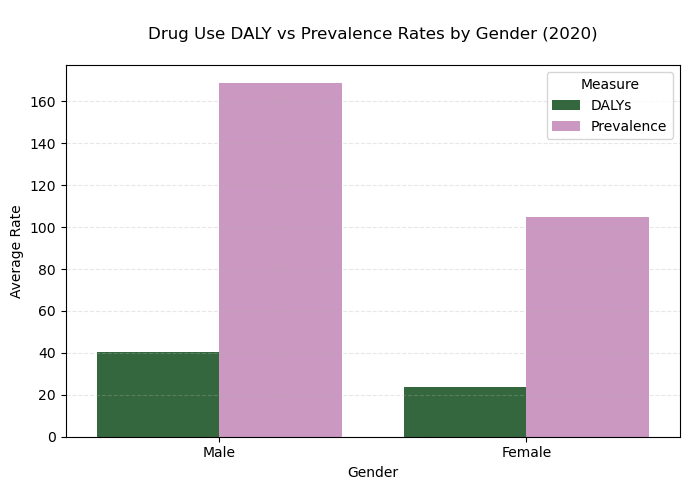

In [64]:
# Drug Use: DALY vs Prevalence by Gender

plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='DrugUse_Rate', hue='Measure', data=drug_2020, estimator='mean', ci=None, palette='cubehelix')
plt.title("\nDrug Use DALY vs Prevalence Rates by Gender (2020)\n")
plt.xlabel("Gender")
plt.ylabel("Average Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Measure")
plt.tight_layout()
plt.show()

### **Data Cleaning**

##### The basic data cleaning was already done in ***'basic_cleaning.ipynb'***. 

**Removing the 0 values and adding country name and code to all the data files**

In [65]:
# Loading the cleaned Policies file
policies_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_policies_new.csv")

# Standardizing Yes/No values
policies_clean['Has_MH_Policy'] = policies_clean['Has_MH_Policy'].str.strip().str.capitalize()

# Adding country name
policies_clean = policies_clean.merge(country_code_clean[['Code', 'Title']], on='Code', how='left')

# Renaming and reordering columns
policies_clean.rename(columns={
    'Code': 'Country_Code',
    'Title': 'Country_Name'
}, inplace=True)
policies_clean = policies_clean[['Country_Name', 'Country_Code', 'Year', 'Has_MH_Policy']]

# Preview
print("Mental Health Policies (Cleaned):")
display(policies_clean.head())

Mental Health Policies (Cleaned):


,Country_Name,Country_Code,Year,Has_MH_Policy
0,Mozambique,MOZ,2011,No
1,Mauritania,MRT,2011,Yes
2,Mauritius,MUS,2011,No
3,Malawi,MWI,2011,No
4,Malaysia,MYS,2011,Yes


In [66]:
# Loading the cleaned Legislation file
legislation_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_legislation_new.csv")

# Standardizing Yes/No values
legislation_clean['Has_MH_Legislation'] = legislation_clean['Has_MH_Legislation'].str.strip().str.capitalize()

# Adding country name
legislation_clean = legislation_clean.merge(country_code_clean[['Code', 'Title']], on='Code', how='left')

# Renaming and reordering columns
legislation_clean.rename(columns={
    'Code': 'Country_Code',
    'Title': 'Country_Name'
}, inplace=True)
legislation_clean = legislation_clean[['Country_Name', 'Country_Code', 'Year', 'Has_MH_Legislation']]

# Preview
print("Mental Health Legislation (Cleaned):")
display(legislation_clean.head())

Mental Health Legislation (Cleaned):


,Country_Name,Country_Code,Year,Has_MH_Legislation
0,Afghanistan,AFG,2016,Yes
1,Angola,AGO,2016,No
2,Albania,ALB,2016,Yes
3,United Arab Emirates,ARE,2016,Yes
4,Argentina,ARG,2016,Yes


In [67]:
# Loading the cleaned Services file
services_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_services_new.csv")

# Standardizing Yes/No values
services_clean['Has_MH_Services'] = services_clean['Has_MH_Services'].str.strip().str.capitalize()

# Adding country name
services_clean = services_clean.merge(country_code_clean[['Code', 'Title']], on='Code', how='left')

# Renaming and reordering columns
services_clean.rename(columns={
    'Code': 'Country_Code',
    'Title': 'Country_Name'
}, inplace=True)
services_clean = services_clean[['Country_Name', 'Country_Code', 'Year', 'Has_MH_Services']]

# Preview
print("Mental Health Services (Cleaned):")
display(services_clean.head())

Mental Health Services (Cleaned):


,Country_Name,Country_Code,Year,Has_MH_Services
0,Afghanistan,AFG,2016,Yes
1,Angola,AGO,2016,No
2,Albania,ALB,2016,Yes
3,United Arab Emirates,ARE,2016,Yes
4,Argentina,ARG,2016,Yes


In [68]:
# Loading the cleaned Financing file
financing_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_financing_new.csv")

# Renaming column for clarity
financing_clean.rename(columns={
    'Value': 'MH_Financing_%',
    'Code': 'Country_Code'
}, inplace=True)

# Adding country name
financing_clean = financing_clean.merge(country_code_clean[['Code', 'Title']], left_on='Country_Code', right_on='Code', how='left')
financing_clean.rename(columns={'Title': 'Country_Name'}, inplace=True)

# Reordering columns
financing_clean = financing_clean[['Country_Name', 'Country_Code', 'Year', 'MH_Financing_%']]

# Preview
print("Mental Health Financing (Cleaned):")
display(financing_clean.head())

Mental Health Financing (Cleaned):


,Country_Name,Country_Code,Year,MH_Financing_%
0,Malawi,MWI,2011,1.00
1,Malaysia,MYS,2011,0.39
2,Nicaragua,NIC,2011,1.00
3,Netherlands,NLD,2011,10.65
4,Nepal,NPL,2011,0.70


In [69]:
# Drop rows where financing value is 0 (if applicable)
financing_clean = financing_clean[financing_clean['MH_Financing_%'] != 0]
print(f"Remaining rows in Financing (non-zero): {len(financing_clean)}")

Remaining rows in Financing (non-zero): 78


In [70]:
# Loading the cleaned Workforce file
workforce_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\mh_workforce_new.csv")

# Renaming column for clarity
workforce_clean.rename(columns={
    'Value': 'MH_Workforce_per100k',
    'Code': 'Country_Code'
}, inplace=True)

# Adding country name
workforce_clean = workforce_clean.merge(country_code_clean[['Code', 'Title']], left_on='Country_Code', right_on='Code', how='left')
workforce_clean.rename(columns={'Title': 'Country_Name'}, inplace=True)

# Reordering columns
workforce_clean = workforce_clean[['Country_Name', 'Country_Code', 'Year', 'MH_Workforce_per100k']]

# Preview
print("Mental Health Workforce (Cleaned):")
display(workforce_clean.head())

Mental Health Workforce (Cleaned):


,Country_Name,Country_Code,Year,MH_Workforce_per100k
0,Armenia,ARM,2016,19.5
1,Antigua and Barbuda,ATG,2016,8.0
2,Australia,AUS,2015,7.8
3,Azerbaijan,AZE,2016,3.5
4,Burundi,BDI,2017,0.2


In [71]:
# Drop rows where workforce per 100k is 0 (if applicable)
workforce_clean = workforce_clean[workforce_clean['MH_Workforce_per100k'] != 0]
print(f"Remaining rows in Workforce (non-zero): {len(workforce_clean)}")

Remaining rows in Workforce (non-zero): 76


In [72]:
# Loading the cleaned General Health System Score file
general_health_clean = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\processed data\new access to care\general_hs_score_cleaned.csv")

# Renaming column for clarity
general_health_clean.rename(columns={
    'Value': 'Health_System_Score',
    'Code': 'Country_Code'
}, inplace=True)

# Adding country name
general_health_clean = general_health_clean.merge(country_code_clean[['Code', 'Title']], left_on='Country_Code', right_on='Code', how='left')
general_health_clean.rename(columns={'Title': 'Country_Name'}, inplace=True)

# Reordering columns
general_health_clean = general_health_clean[['Country_Name', 'Country_Code', 'Year', 'HealthSystem_Score']]

# Preview
print("General Health System Score (Cleaned):")
display(general_health_clean.head())


General Health System Score (Cleaned):


,Country_Name,Country_Code,Year,HealthSystem_Score
0,Lithuania,LTU,2017,0
1,Luxembourg,LUX,2017,40
2,Madagascar,MDG,2017,40
3,Malawi,MWI,2017,100
4,Maldives,MDV,2017,40


In [73]:
# Drop rows where system score is 0 (if applicable)
general_health_clean = general_health_clean[general_health_clean['HealthSystem_Score'] != 0]
print(f"Remaining rows in Health Score (non-zero): {len(general_health_clean)}")

general_health_clean.head()

Remaining rows in Health Score (non-zero): 1058


,Country_Name,Country_Code,Year,HealthSystem_Score
1,Luxembourg,LUX,2017,40
2,Madagascar,MDG,2017,40
3,Malawi,MWI,2017,100
4,Maldives,MDV,2017,40
5,Mali,MLI,2017,40


In [74]:
# Removing rows with 0 values
anxiety_clean = anxiety_clean[anxiety_clean['Anxiety_Rate'] != 0]

# Adding Country Code based on Country Name
anxiety_clean = anxiety_clean.merge(country_code_clean[['Code', 'Title']], left_on='Country', right_on='Title', how='left')

# Renaming and reordering columns
anxiety_clean.rename(columns={
    'Country': 'Country_Name',
    'Code': 'Country_Code'
}, inplace=True)
anxiety_clean = anxiety_clean[['Country_Name', 'Country_Code', 'Year', 'Measure', 'Sex', 'Age_Group', 'Anxiety_Rate']]

# Preview
print("Anxiety Disorder (Cleaned):")
display(anxiety_clean.head())

Anxiety Disorder (Cleaned):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Anxiety_Rate
0,France,FRA,2019,DALYs,Male,<5 years,18.133133
1,France,FRA,2019,DALYs,Female,<5 years,39.170861
2,France,FRA,2019,DALYs,Male,5-9 years,258.626165
3,France,FRA,2019,DALYs,Female,5-9 years,556.988287
4,France,FRA,2019,DALYs,Male,10-14 years,624.127118


In [75]:
# List of disorder dataframes and their rate column names
disorder_files = {
    'anxiety_clean': 'Anxiety_Rate',
    'bipolar_clean': 'BipolarDisorder_Rate',
    'depression_clean': 'Depression_Rate',
    'eating_disorders_clean': 'EatingDisorder_Rate',
    'schizophrenia_clean': 'Schizophrenia_Rate',
    'self_harm_clean': 'SelfHarm_Rate'
}

# Cleaning all the disorder files
for df_name, rate_col in disorder_files.items():
    df = globals()[df_name]

    # Removing rows with 0 values
    df = df[df[rate_col] != 0]

    # Column merging
    if 'Country' in df.columns:
        merge_col = 'Country'
    elif 'Country_Name' in df.columns:
        merge_col = 'Country_Name'
    else:
        print(f"Skipping {df_name}: No country column found!")
        continue

    # Merge to get Country_Code
    df = df.merge(country_code_clean[['Code', 'Title']], left_on=merge_col, right_on='Title', how='left')

    # Rename and reorder
    df.rename(columns={
        merge_col: 'Country_Name',
        'Code': 'Country_Code'
    }, inplace=True)
    df = df[['Country_Name', 'Country_Code', 'Year', 'Measure', 'Sex', 'Age_Group', rate_col]]

    # Store cleaned version
    globals()[df_name] = df

    # Preview
    print(f"{df_name.replace('_clean', '').capitalize()} (Cleaned):")
    display(df.head())

Anxiety (Cleaned):


,Country_Name,Country_Code,Country_Code,Year,Measure,Sex,Age_Group,Anxiety_Rate
0,France,FRA,FRA,2019,DALYs,Male,<5 years,18.133133
1,France,FRA,FRA,2019,DALYs,Female,<5 years,39.170861
2,France,FRA,FRA,2019,DALYs,Male,5-9 years,258.626165
3,France,FRA,FRA,2019,DALYs,Female,5-9 years,556.988287
4,France,FRA,FRA,2019,DALYs,Male,10-14 years,624.127118


Bipolar (Cleaned):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,BipolarDisorder_Rate
0,Papua New Guinea,PNG,2019,DALYs,Male,10-14 years,9.890123
1,Papua New Guinea,PNG,2019,DALYs,Female,10-14 years,9.567831
2,Papua New Guinea,PNG,2019,DALYs,Male,15-19 years,50.514771
3,Papua New Guinea,PNG,2019,DALYs,Female,15-19 years,49.259849
4,Papua New Guinea,PNG,2019,DALYs,Male,20-24 years,74.283936


Depression (Cleaned):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Depression_Rate
0,Solomon Islands,SLB,2019,DALYs,Male,<5 years,0.161758
1,Solomon Islands,SLB,2019,DALYs,Female,<5 years,0.194132
2,Solomon Islands,SLB,2019,DALYs,Male,5-9 years,12.068310
3,Solomon Islands,SLB,2019,DALYs,Female,5-9 years,17.097339
4,Solomon Islands,SLB,2019,DALYs,Male,10-14 years,108.939149


Eating_disorders (Cleaned):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,EatingDisorder_Rate
0,Comoros,COM,2019,Deaths,Male,5-9 years,1.459864e-06
1,Comoros,COM,2019,Deaths,Female,5-9 years,2.437709e-07
2,Comoros,COM,2019,Deaths,Male,10-14 years,2.011334e-06
3,Comoros,COM,2019,Deaths,Female,10-14 years,4.875481e-06
4,Comoros,COM,2019,Deaths,Male,15-19 years,1.398148e-05


Schizophrenia (Cleaned):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Schizophrenia_Rate
0,Papua New Guinea,PNG,2019,DALYs,Male,10-14 years,7.968040
1,Papua New Guinea,PNG,2019,DALYs,Female,10-14 years,6.678416
2,Papua New Guinea,PNG,2019,DALYs,Male,15-19 years,60.145136
3,Papua New Guinea,PNG,2019,DALYs,Female,15-19 years,49.155488
4,Papua New Guinea,PNG,2019,DALYs,Male,20-24 years,190.038315


Self_harm (Cleaned):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,SelfHarm_Rate
0,Fiji,FJI,2021,Deaths,Male,10-14 years,2.974103
1,Fiji,FJI,2021,Deaths,Female,10-14 years,1.962214
2,Fiji,FJI,2021,Deaths,Male,15-19 years,14.294907
3,Fiji,FJI,2021,Deaths,Female,15-19 years,13.852333
4,Fiji,FJI,2021,Deaths,Male,20-24 years,26.878882


In [76]:
# Reload the raw alcohol use data
alcohol_use_raw = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\substance use\alcohol.csv")

# Rename 'location' to 'Country' if needed (defensive check)
if 'location' in alcohol_use_raw.columns:
    alcohol_use_raw.rename(columns={'location': 'Country'}, inplace=True)

# Drop rows with 0 AlcoholUse_Rate
alcohol_use_clean = alcohol_use_raw[alcohol_use_raw['val'] != 0].copy()

# Keep only necessary columns and rename
alcohol_use_clean = alcohol_use_clean[['Country', 'year', 'measure', 'sex', 'age', 'val']].copy()
alcohol_use_clean.rename(columns={
    'Country': 'Country_Name',
    'year': 'Year',
    'measure': 'Measure',
    'sex': 'Sex',
    'age': 'Age_Group',
    'val': 'AlcoholUse_Rate'
}, inplace=True)

# Merge to get Country_Code
alcohol_use_clean = alcohol_use_clean.merge(
    country_code_clean[['Code', 'Title']],
    left_on='Country_Name',
    right_on='Title',
    how='left'
)

# Rename code column, drop extras
alcohol_use_clean.rename(columns={'Code': 'Country_Code'}, inplace=True)
alcohol_use_clean.drop(columns=['Title'], inplace=True)

# Final column order
alcohol_use_clean = alcohol_use_clean[['Country_Name', 'Country_Code', 'Year', 'Measure', 'Sex', 'Age_Group', 'AlcoholUse_Rate']]

# Preview
print("Alcohol Use (Cleaned):")
display(alcohol_use_clean.head())

Alcohol Use (Cleaned):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,AlcoholUse_Rate
0,Comoros,COM,2019,Deaths,Male,15-19 years,0.006473
1,Comoros,COM,2019,Deaths,Female,15-19 years,0.023398
2,Comoros,COM,2019,Deaths,Male,20-24 years,0.026421
3,Comoros,COM,2019,Deaths,Female,20-24 years,0.126332
4,Comoros,COM,2019,Deaths,Male,25-29 years,0.490017


In [77]:
# Reload the raw drug use data (both files if needed)
drug_use_raw1 = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\substance use\drug1.csv")
drug_use_raw2 = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\substance use\drug2.csv")

# Combine both datasets
drug_use_raw = pd.concat([drug_use_raw1, drug_use_raw2], ignore_index=True)

# Drop rows where rate is zero
drug_use_clean = drug_use_raw[drug_use_raw['val'] != 0].copy()

# Select and rename relevant columns
drug_use_clean = drug_use_clean[['location', 'year', 'measure', 'sex', 'age', 'cause', 'val']].copy()
drug_use_clean.rename(columns={
    'location': 'Country_Name',
    'year': 'Year',
    'measure': 'Measure',
    'sex': 'Sex',
    'age': 'Age_Group',
    'cause': 'Drug_Type',
    'val': 'DrugUse_Rate'
}, inplace=True)

# Merge to get Country_Code
drug_use_clean = drug_use_clean.merge(
    country_code_clean[['Code', 'Title']],
    left_on='Country_Name',
    right_on='Title',
    how='left'
)

# Finalize columns
drug_use_clean.rename(columns={'Code': 'Country_Code'}, inplace=True)
drug_use_clean.drop(columns=['Title'], inplace=True)

# Reorder
drug_use_clean = drug_use_clean[['Country_Name', 'Country_Code', 'Year', 'Measure', 'Sex', 'Age_Group', 'Drug_Type', 'DrugUse_Rate']]

# Preview
print("Drug Use Disorder (Cleaned):")
display(drug_use_clean.head())

Drug Use Disorder (Cleaned):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Drug_Type,DrugUse_Rate
0,Trinidad and Tobago,TTO,2021,Deaths,Male,15-19 years,Drug use disorders,0.133438
1,Trinidad and Tobago,TTO,2021,Deaths,Female,15-19 years,Drug use disorders,0.078388
2,Trinidad and Tobago,TTO,2021,Deaths,Male,20-24 years,Drug use disorders,0.654840
3,Trinidad and Tobago,TTO,2021,Deaths,Female,20-24 years,Drug use disorders,0.222861
4,Trinidad and Tobago,TTO,2021,Deaths,Male,25-29 years,Drug use disorders,1.132297


In [78]:
# Psychiatrists per Capita — Raw Data

# Renaming for consistency
psychiatrists_df = pd.read_csv(r"C:\Users\mehek\Desktop\STML 4\data\original data\psychiatrists_per100000.csv")

# Renaming columns for clarity
psychiatrists_clean = psychiatrists_df.rename(columns={
    'Entity': 'Country_Name',
    'Code': 'Country_Code',
    'total_number_of_psychiatrists__per_100_000_population': 'Psychiatrists_per_100k'
})

# Drop rows with 0 or missing values
psychiatrists_clean.dropna(subset=['Psychiatrists_per_100k'], inplace=True)
psychiatrists_clean = psychiatrists_clean[psychiatrists_clean['Psychiatrists_per_100k'] != 0]

# Reorder columns
psychiatrists_clean = psychiatrists_clean[['Country_Name', 'Country_Code', 'Year', 'Psychiatrists_per_100k']]

# Exporting the cleaned file locally
# psychiatrists_clean.to_csv(r"C:\Users\mehek\Downloads\psychiatrists_cleaned.csv", index=False)

# Preview
print("Psychiatrists per Capita (Raw Data):")
display(psychiatrists_df.head())

print("Psychiatrists per Capita (Cleaned):")
display(psychiatrists_clean.head())

Psychiatrists per Capita (Raw Data):


,Entity,Code,Year,total_number_of_psychiatrists__per_100_000_population
0,Afghanistan,AFG,2019,0
1,Albania,ALB,2019,2
2,Algeria,DZA,2019,2
3,Andorra,AND,2019,10
4,Antigua and Barbuda,ATG,2019,1


Psychiatrists per Capita (Cleaned):


,Country_Name,Country_Code,Year,Psychiatrists_per_100k
1,Albania,ALB,2019,2
2,Algeria,DZA,2019,2
3,Andorra,AND,2019,10
4,Antigua and Barbuda,ATG,2019,1
5,Argentina,ARG,2019,15


### **Data Manipulation**

- Combining all cleaned *access to care* datasets into a single master DataFrame.
- Merging them allows us to analyze each country’s mental health infrastructure comprehensively and relate it to the burden of mental illness. T- he merge is done on *Country_Code* and *Year* to ensure alignment across all indicators.

In [79]:
# OPTIONAL!!

# Drop Country_Name only if it exists
for df in [services_clean, legislation_clean, financing_clean, workforce_clean, general_health_clean, psychiatrists_clean]:
    if 'Country_Name' in df.columns:
        df.drop(columns='Country_Name', inplace=True)

# Merging policies with services
access_merged = policies_clean.merge(services_clean, on=['Country_Code', 'Year'], how='left')

# Merging with legislation
access_merged = access_merged.merge(legislation_clean, on=['Country_Code', 'Year'], how='left')

# Merging with financing
access_merged = access_merged.merge(financing_clean, on=['Country_Code', 'Year'], how='left')

# Merging with workforce
access_merged = access_merged.merge(workforce_clean, on=['Country_Code', 'Year'], how='left')

# Merging with general health system score
access_merged = access_merged.merge(general_health_clean, on=['Country_Code', 'Year'], how='left')

# Merging with psychiatrists per 100k
access_merged = access_merged.merge(psychiatrists_clean, on=['Country_Code', 'Year'], how='left')

# Reordering final columns
access_merged = access_merged[['Country_Name', 'Country_Code', 'Year',
                               'Has_MH_Policy', 'Has_MH_Services', 'Has_MH_Legislation',
                               'MH_Financing_%', 'MH_Workforce_per100k',
                               'HealthSystem_Score', 'Psychiatrists_per_100k']]

# Preview
print("Merged Access to Care Data:")
display(access_merged.head())

Merged Access to Care Data:


,Country_Name,Country_Code,Year,Has_MH_Policy,Has_MH_Services,Has_MH_Legislation,MH_Financing_%,MH_Workforce_per100k,HealthSystem_Score,Psychiatrists_per_100k
0,Mozambique,MOZ,2011,No,NaN,NaN,0.16,NaN,100.0,NaN
1,Mauritania,MRT,2011,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,Mauritius,MUS,2011,No,NaN,NaN,NaN,NaN,NaN,NaN
3,Malawi,MWI,2011,No,NaN,NaN,1.00,NaN,25.0,NaN
4,Malaysia,MYS,2011,Yes,NaN,NaN,0.39,NaN,100.0,NaN


In [80]:
# Dropping the 'Psychiatrists_per_100k' column due to incompatible years (2019–2021 only)
if 'Psychiatrists_per_100k' in access_merged.columns:
    access_merged.drop(columns='Psychiatrists_per_100k', inplace=True)

# Filling missing values in Yes/No columns with 'No'
access_merged[['Has_MH_Policy', 'Has_MH_Services', 'Has_MH_Legislation']] = access_merged[
    ['Has_MH_Policy', 'Has_MH_Services', 'Has_MH_Legislation']
].fillna('No')

# Filling missing values in numeric columns with 0
access_merged[['MH_Financing_%', 'MH_Workforce_per100k', 'HealthSystem_Score']] = access_merged[
    ['MH_Financing_%', 'MH_Workforce_per100k', 'HealthSystem_Score']
].fillna(0)

# Exporting merged access-to-care dataset to Downloads folder
access_merged.to_csv(r"C:\Users\mehek\Downloads\access_merged.csv", index=False)

# Preview
print("Access to Care Data (After Handling Missing Values):")
display(access_merged.head())

Access to Care Data (After Handling Missing Values):


,Country_Name,Country_Code,Year,Has_MH_Policy,Has_MH_Services,Has_MH_Legislation,MH_Financing_%,MH_Workforce_per100k,HealthSystem_Score
0,Mozambique,MOZ,2011,No,No,No,0.16,0.0,100.0
1,Mauritania,MRT,2011,Yes,No,No,0.00,0.0,0.0
2,Mauritius,MUS,2011,No,No,No,0.00,0.0,0.0
3,Malawi,MWI,2011,No,No,No,1.00,0.0,25.0
4,Malaysia,MYS,2011,Yes,No,No,0.39,0.0,100.0


Handling Missing Values in the Access to Care Dataset:

To ensure consistent and complete records across all country-year pairs, missing values were addressed as follows:

- The column 'Psychiatrists_per_100k' was excluded from the merged dataset due to incompatible year ranges (available only from 2019–2021), while the rest of the data spans 2011–2019.
- For binary columns (Has_MH_Policy, Has_MH_Services, Has_MH_Legislation), Nan values were filled with 'No' to reflect the absence of policy or service data.
- For numerical columns (MH_Financing_%, MH_Workforce_per100k, Health_System_Score), Nan values were replaced with 0, indicating no investment or no recorded data.

This method allows the inclusion of all available observations without introducing inconsistencies or excluding partial records.

In [81]:
# List of disorder dataframes and their disorder names
disorder_data = [
    (anxiety_clean.copy(), 'Anxiety'),
    (bipolar_clean.copy(), 'Bipolar'),
    (depression_clean.copy(), 'Depression'),
    (eating_disorders_clean.copy(), 'Eating Disorders'),
    (schizophrenia_clean.copy(), 'Schizophrenia'),
    (self_harm_clean.copy(), 'Self-Harm')
]

# List to hold formatted dataframes
disorder_frames = []

# Process each dataset
for df, name in disorder_data:
    df.columns = df.columns.astype(str)  
    df = df.loc[:, ~df.columns.duplicated()]  # Remove any duplicate columns
    rate_col = [col for col in df.columns if col.endswith('_Rate')][0]
    df['Disorder_Name'] = name
    df.rename(columns={rate_col: 'Disorder_Rate'}, inplace=True)
    df = df[['Country_Name', 'Country_Code', 'Year', 'Measure', 'Sex', 'Age_Group', 'Disorder_Name', 'Disorder_Rate']]
    disorder_frames.append(df)

# Combine all into one long dataframe
disorders_long = pd.concat(disorder_frames, ignore_index=True)

# Preview
print("Merged Disorders (Long Format):")
display(disorders_long.head())

Merged Disorders (Long Format):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Disorder_Name,Disorder_Rate
0,France,FRA,2019,DALYs,Male,<5 years,Anxiety,18.133133
1,France,FRA,2019,DALYs,Female,<5 years,Anxiety,39.170861
2,France,FRA,2019,DALYs,Male,5-9 years,Anxiety,258.626165
3,France,FRA,2019,DALYs,Female,5-9 years,Anxiety,556.988287
4,France,FRA,2019,DALYs,Male,10-14 years,Anxiety,624.127118


In [82]:
# Redefine the age binning function
def categorize_age_group(age):
    age = str(age)
    match = re.search(r'\d+', age)
    if match:
        start_age = int(match.group())
    else:
        return '70+'

    if start_age < 10:
        return '0–10'
    elif 10 <= start_age < 15:
        return '10–15'
    elif 15 <= start_age < 30:
        return '15–30'
    elif 30 <= start_age < 45:
        return '30–45'
    elif 45 <= start_age < 60:
        return '45–60'
    elif 60 <= start_age < 70:
        return '60–70'
    else:
        return '70+'

# Recreate the column
disorders_long['Custom_Age_Bin'] = disorders_long['Age_Group'].apply(categorize_age_group)

# Now replace the Age_Group with the custom bin
disorders_long['Age_Group'] = disorders_long['Custom_Age_Bin']
disorders_long.drop(columns='Custom_Age_Bin', inplace=True)

# Preview
print("Age Group Column Updated with Custom Bins:")
display(disorders_long.head())

Age Group Column Updated with Custom Bins:


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Disorder_Name,Disorder_Rate
0,France,FRA,2019,DALYs,Male,0–10,Anxiety,18.133133
1,France,FRA,2019,DALYs,Female,0–10,Anxiety,39.170861
2,France,FRA,2019,DALYs,Male,0–10,Anxiety,258.626165
3,France,FRA,2019,DALYs,Female,0–10,Anxiety,556.988287
4,France,FRA,2019,DALYs,Male,10–15,Anxiety,624.127118


Customised the age groups for better understanding of the data and easy processing.

In [83]:
# Splitting the data into DALYs and Prevalence

disorders_daly = disorders_long[disorders_long['Measure'] == 'DALYs'].copy()
disorders_prev = disorders_long[disorders_long['Measure'] == 'Prevalence'].copy()

# Preview
print("Disorder DALYs Data:")
display(disorders_daly.head())

print("Disorder Prevalence Data:")
display(disorders_prev.head())

Disorder DALYs Data:


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Disorder_Name,Disorder_Rate
0,France,FRA,2019,DALYs,Male,0–10,Anxiety,18.133133
1,France,FRA,2019,DALYs,Female,0–10,Anxiety,39.170861
2,France,FRA,2019,DALYs,Male,0–10,Anxiety,258.626165
3,France,FRA,2019,DALYs,Female,0–10,Anxiety,556.988287
4,France,FRA,2019,DALYs,Male,10–15,Anxiety,624.127118


Disorder Prevalence Data:


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Disorder_Name,Disorder_Rate
51408,China,CHN,2019,Prevalence,Male,60–70,Anxiety,3272.141486
51409,China,CHN,2019,Prevalence,Female,60–70,Anxiety,4878.061174
51410,China,CHN,2020,Prevalence,Male,60–70,Anxiety,3392.155012
51411,China,CHN,2020,Prevalence,Female,60–70,Anxiety,5057.396727
51412,China,CHN,2021,Prevalence,Male,60–70,Anxiety,3536.142603


In [84]:
# Exporting the CSV files
# disorders_daly.to_csv(r"C:\Users\mehek\Downloads\disorders_daly.csv", index=False)
# disorders_prev.to_csv(r"C:\Users\mehek\Downloads\disorders_prev.csv", index=False)

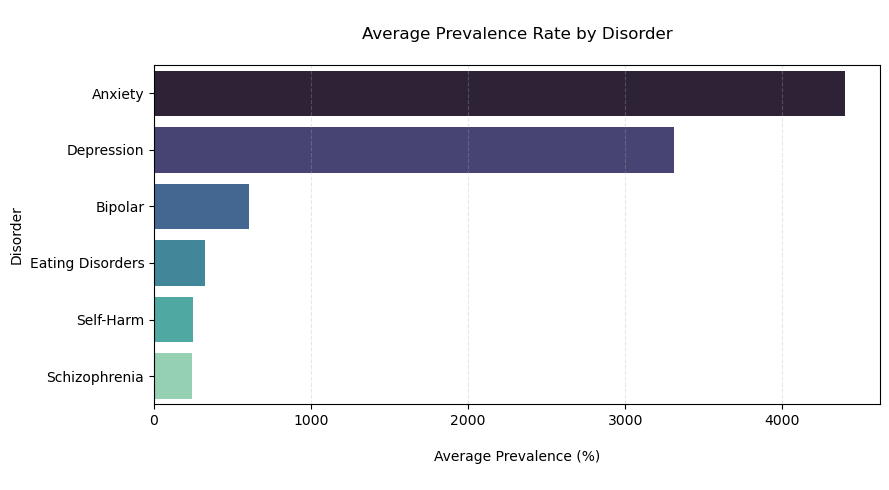

In [85]:
# Define only mental health disorders (manually confirmed)
mental_disorders = [
    'Anxiety', 'Depression', 'Bipolar', 'Schizophrenia',
    'Eating Disorders', 'Self-Harm'
]

# Filter: Only Prevalence and mental health disorders
prevalence_df = disorders_long[
    (disorders_long['Measure'] == 'Prevalence') &
    (disorders_long['Disorder_Name'].isin(mental_disorders))
]

# Group and sort
prevalence_summary = prevalence_df.groupby('Disorder_Name')['Disorder_Rate'].mean().reset_index().sort_values(by='Disorder_Rate', ascending=False)

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(data=prevalence_summary, x='Disorder_Rate', y='Disorder_Name', palette='mako')
plt.title("\nAverage Prevalence Rate by Disorder\n")
plt.xlabel("\nAverage Prevalence (%)\n")
plt.ylabel("Disorder")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

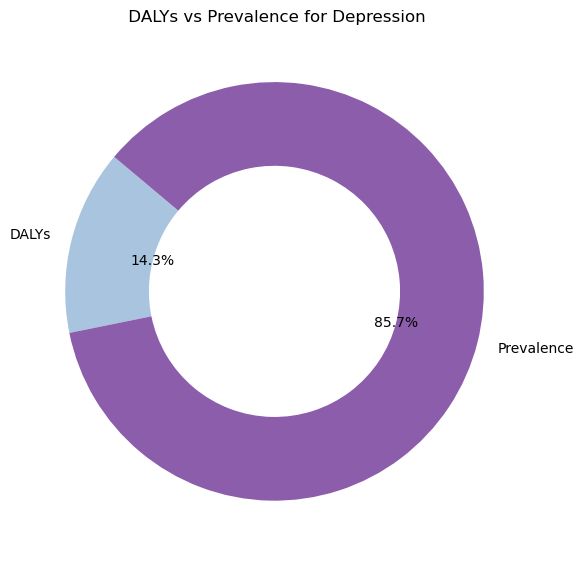

In [167]:
# DALYs vs Prevalence for Depression

# Filter data for Depression
depression_all = disorders_long[disorders_long['Disorder_Name'] == 'Depression']

# Group by Measure and calculate average
depression_summary = depression_all.groupby('Measure')['Disorder_Rate'].mean().reset_index()

# Donut Chart
plt.figure(figsize=(6, 6))
colors = sns.color_palette('pink')[0:len(depression_summary)]
plt.pie(depression_summary['Disorder_Rate'], labels=depression_summary['Measure'], 
        colors = sns.color_palette('BuPu', n_colors=len(depression_summary)),
        autopct='%.1f%%', startangle=140, wedgeprops={'width': 0.4})
plt.title(" DALYs vs Prevalence for Depression")
plt.tight_layout()
plt.show()

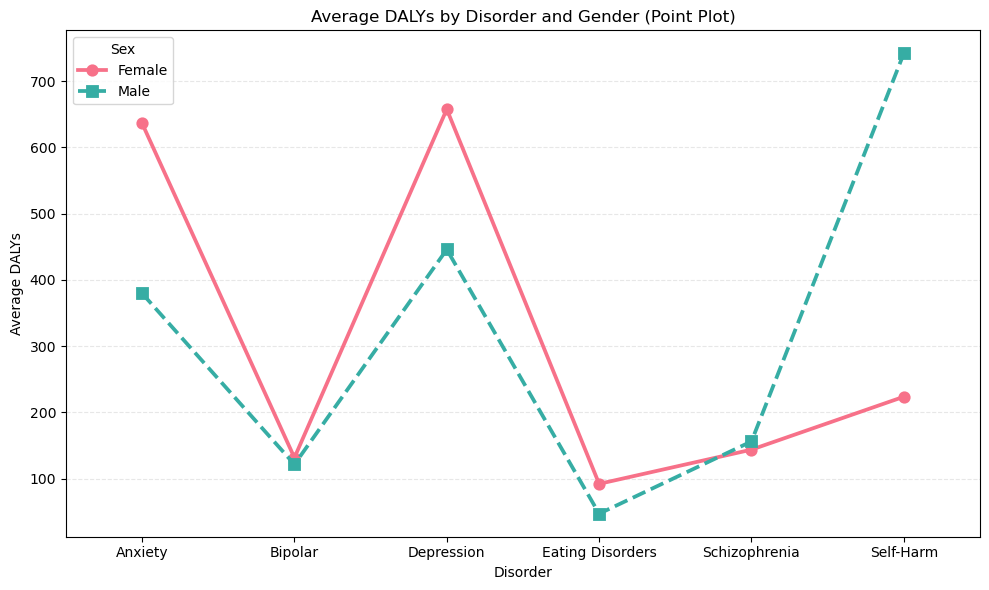

In [87]:
# Filter only DALY rows for core mental disorders
mental_disorders = [
    'Anxiety', 'Depression', 'Bipolar', 'Schizophrenia',
    'Eating Disorders', 'Self-Harm'
]
daly_df = disorders_long[
    (disorders_long['Measure'] == 'DALYs') & 
    (disorders_long['Disorder_Name'].isin(mental_disorders))
]

# Group by disorder and sex
daly_gender_summary = daly_df.groupby(['Disorder_Name', 'Sex'])['Disorder_Rate'].mean().reset_index()

# Plot - Point Plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=daly_gender_summary, x='Disorder_Name', y='Disorder_Rate', hue='Sex',
              palette='husl', markers=["o", "s"], linestyles=["-", "--"])
plt.title("Average DALYs by Disorder and Gender (Point Plot)")
plt.ylabel("Average DALYs")
plt.xlabel("Disorder")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


Comment:
- This plot shows which disorders impose the greatest health burden and how that burden differ between males and females.

In [88]:
# Alcohol Use Disorder overview
# alcohol_use_clean.head()

In [89]:
# Function to assign new age bins
def categorize_age_group(age):
    age = str(age)
    match = re.search(r'\d+', age)
    if match:
        start_age = int(match.group())
    else:
        return '70+'

    if start_age < 10:
        return '0–10'
    elif 10 <= start_age < 15:
        return '10–15'
    elif 15 <= start_age < 30:
        return '15–30'
    elif 30 <= start_age < 45:
        return '30–45'
    elif 45 <= start_age < 60:
        return '45–60'
    elif 60 <= start_age < 70:
        return '60–70'
    else:
        return '70+'

# Apply to alcohol data
alcohol_use_clean['Age_Group'] = alcohol_use_clean['Age_Group'].apply(categorize_age_group)
print("Alcohol Use Disorder (after age grouping):")
display(alcohol_use_clean.head())
# Apply to drug data
drug_use_clean['Age_Group'] = drug_use_clean['Age_Group'].apply(categorize_age_group)
print("\n\nDrug Use Disorder (after age grouping):")
display(drug_use_clean.head())

Alcohol Use Disorder (after age grouping):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,AlcoholUse_Rate
0,Comoros,COM,2019,Deaths,Male,15–30,0.006473
1,Comoros,COM,2019,Deaths,Female,15–30,0.023398
2,Comoros,COM,2019,Deaths,Male,15–30,0.026421
3,Comoros,COM,2019,Deaths,Female,15–30,0.126332
4,Comoros,COM,2019,Deaths,Male,15–30,0.490017




Drug Use Disorder (after age grouping):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Drug_Type,DrugUse_Rate
0,Trinidad and Tobago,TTO,2021,Deaths,Male,15–30,Drug use disorders,0.133438
1,Trinidad and Tobago,TTO,2021,Deaths,Female,15–30,Drug use disorders,0.078388
2,Trinidad and Tobago,TTO,2021,Deaths,Male,15–30,Drug use disorders,0.654840
3,Trinidad and Tobago,TTO,2021,Deaths,Female,15–30,Drug use disorders,0.222861
4,Trinidad and Tobago,TTO,2021,Deaths,Male,15–30,Drug use disorders,1.132297


In [90]:
# Combine alcohol and drug use data
substance_use_long = pd.concat([alcohol_use_clean, drug_use_clean], ignore_index=True)

# Preview merged data
print("Substance Use Dataset (Combined):")
display(substance_use_long.head())

Substance Use Dataset (Combined):


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,AlcoholUse_Rate,Drug_Type,DrugUse_Rate
0,Comoros,COM,2019,Deaths,Male,15–30,0.006473,NaN,NaN
1,Comoros,COM,2019,Deaths,Female,15–30,0.023398,NaN,NaN
2,Comoros,COM,2019,Deaths,Male,15–30,0.026421,NaN,NaN
3,Comoros,COM,2019,Deaths,Female,15–30,0.126332,NaN,NaN
4,Comoros,COM,2019,Deaths,Male,15–30,0.490017,NaN,NaN


In [91]:
# DALYs only
substance_daly = substance_use_long[substance_use_long['Measure'] == 'DALYs'].copy()

# Prevalence only
substance_prevalence = substance_use_long[substance_use_long['Measure'] == 'Prevalence'].copy()

# Deaths only
substance_deaths = substance_use_long[substance_use_long['Measure'] == 'Deaths'].copy()

In [92]:
# Exporting the datasets to CSV files

# substance_daly.to_csv(r"C:\Users\mehek\Downloads\substance_daly.csv", index=False)
# substance_prevalence.to_csv(r"C:\Users\mehek\Downloads\substance_prevalence.csv", index=False)
# substance_deaths.to_csv(r"C:\Users\mehek\Downloads\substance_deaths.csv", index=False)

In [94]:
# Check shape and sample of substance_daly
print("Shape of substance_daly:", substance_daly.shape)
display(substance_daly.head())

# Check unique values in Measure column
print("\nUnique Measures:", substance_daly['Measure'].unique())

# Check if Drug_Use_Rate has non-zero values
print("\nSummary of Drug_Use_Rate:")
print(substance_daly['Drug_Use_Rate'].describe())

Shape of substance_daly: (339048, 8)


,Country_Name,Country_Code,Year,Measure,Sex,Age_Group,Drug_Type,Drug_Use_Rate
0,Maldives,MDV,2019,DALYs,Male,0–10,Alcohol Use,0.174352
1,Maldives,MDV,2019,DALYs,Female,0–10,Alcohol Use,0.220905
2,Maldives,MDV,2019,DALYs,Male,0–10,Alcohol Use,0.126553
3,Maldives,MDV,2019,DALYs,Female,0–10,Alcohol Use,0.212012
4,Maldives,MDV,2019,DALYs,Male,0–10,Alcohol Use,0.131850



Unique Measures: ['DALYs']

Summary of Drug_Use_Rate:
count    339048.000000
mean         72.811612
std         207.841007
min           0.000146
25%           1.906816
50%          10.992079
75%          55.922049
max        6214.861707
Name: Drug_Use_Rate, dtype: float64


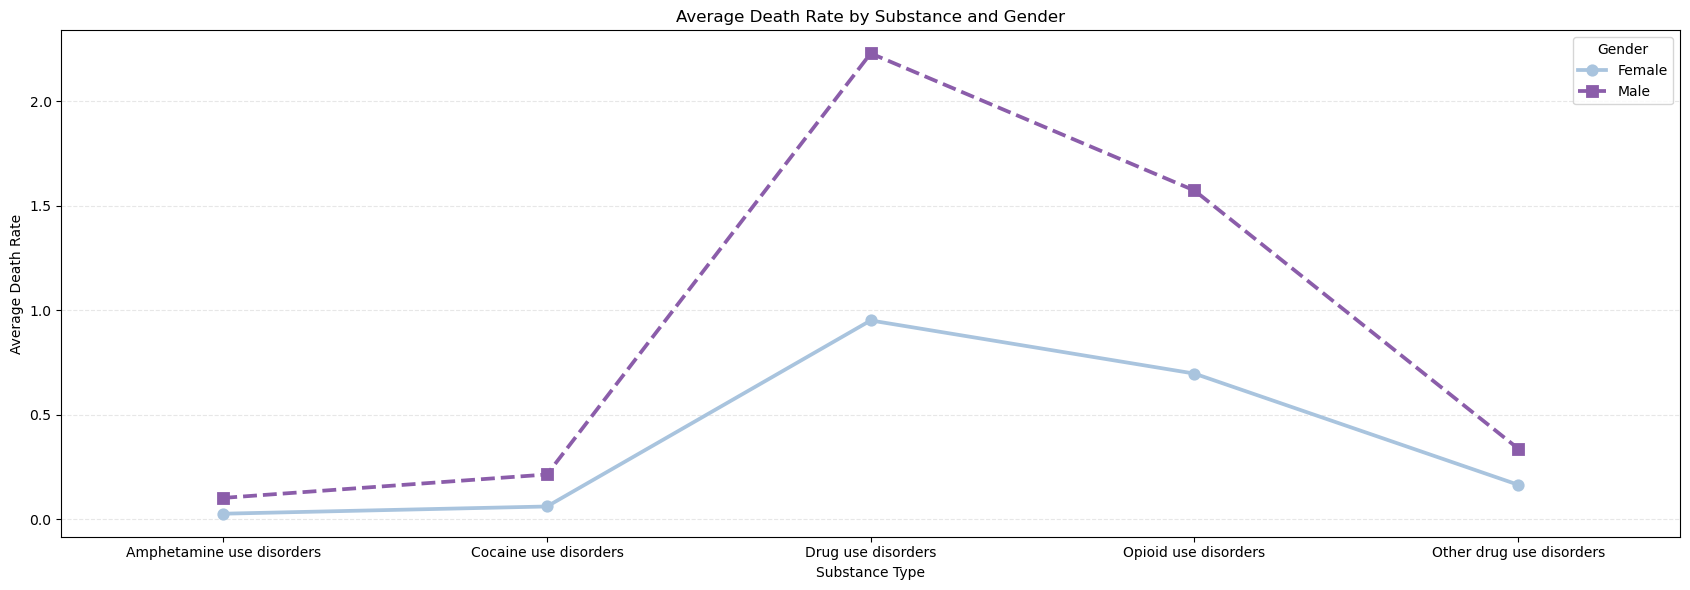

In [95]:
# Group by Drug Type and Sex to get average death rate
death_gender_summary = substance_deaths.groupby(['Drug_Type', 'Sex'])['DrugUse_Rate'].mean().reset_index()

# Plot
plt.figure(figsize=(17, 6))
sns.pointplot(data=death_gender_summary, x='Drug_Type', y='DrugUse_Rate', hue='Sex', 
              palette='BuPu', markers=["o", "s"], linestyles=["-", "--"])
plt.title("Average Death Rate by Substance and Gender")
plt.xlabel("Substance Type")
plt.ylabel("Average Death Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

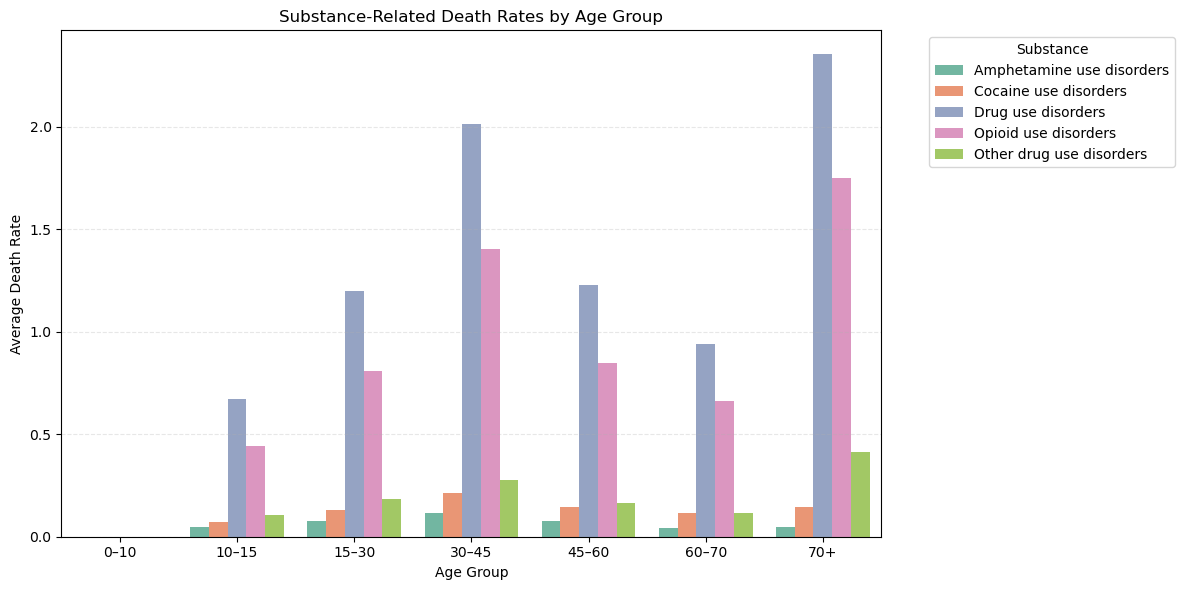

In [96]:
# Deaths by Substance and Age Group

# Group data
age_substance_summary = substance_deaths.groupby(['Age_Group', 'Drug_Type'])['DrugUse_Rate'].mean().reset_index()

# Order age groups
age_order = ['0–10', '10–15', '15–30', '30–45', '45–60', '60–70', '70+']
age_substance_summary['Age_Group'] = pd.Categorical(age_substance_summary['Age_Group'], categories=age_order, ordered=True)
age_substance_summary = age_substance_summary.sort_values('Age_Group')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=age_substance_summary, x='Age_Group', y='DrugUse_Rate', hue='Drug_Type', palette='Set2')
plt.title("Substance-Related Death Rates by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Death Rate")
plt.legend(title="Substance", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

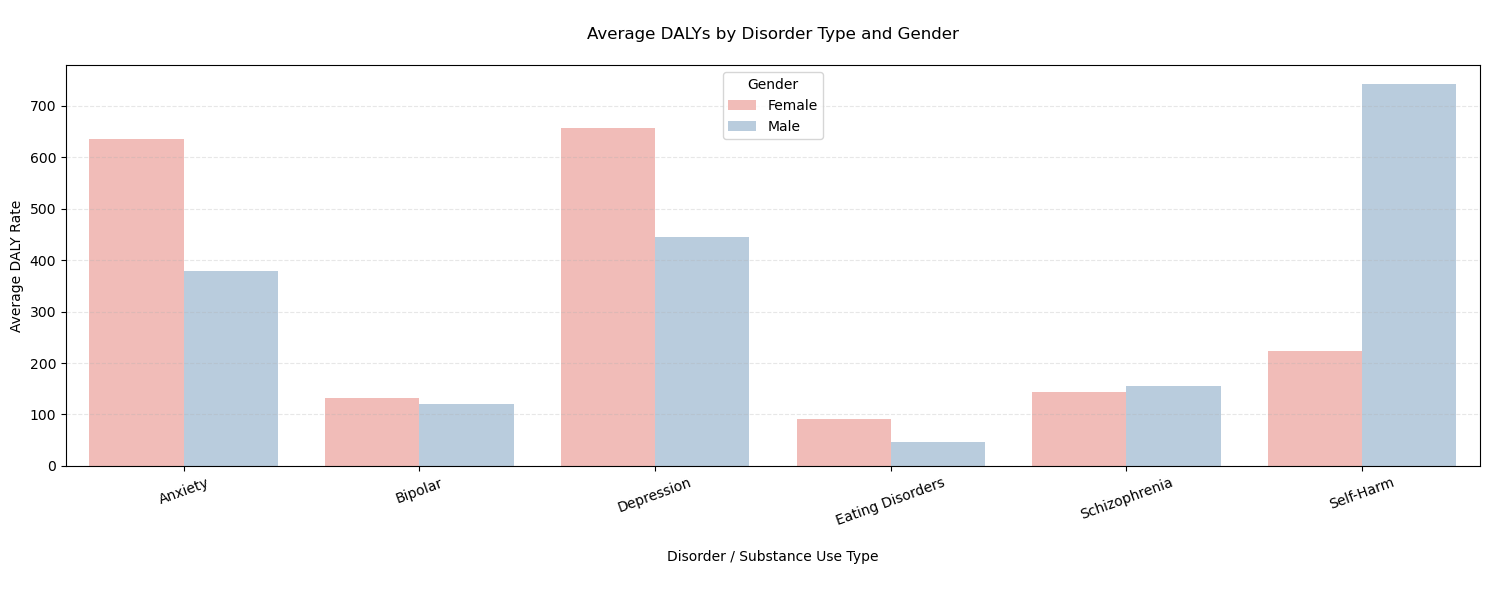

In [97]:
# Combine both datasets
combined_df = pd.concat([disorders_long, substance_use_long], ignore_index=True)

# Filter only DALYs
dalys_sex = combined_df[combined_df['Measure'] == 'DALYs'].copy()

# Group by Disorder and Sex
dalys_gender_summary = dalys_sex.groupby(['Disorder_Name', 'Sex'])['Disorder_Rate'].mean().reset_index()

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(data=dalys_gender_summary, x='Disorder_Name', y='Disorder_Rate', hue='Sex', palette='Pastel1')
plt.title("\nAverage DALYs by Disorder Type and Gender\n")
plt.xlabel("\nDisorder / Substance Use Type\n")
plt.ylabel("Average DALY Rate")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Gender")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

This plot shows the average DALY rates for each disorder and substance use condition, separated by gender. It highlights how the burden of disease differs for males and females across mental health and substance-related issues.

### **Data Modeling**

#### ***Unsupervised Learning Models***

Using various unsupervised machine learning models to find out *What kind of hidden structure or grouping can we discover in the dataset chosen?*

In [98]:
# Extract latest available year for each access indicator

# Policies
latest_policies = policies_clean.sort_values('Year').drop_duplicates('Country_Code', keep='last')[['Country_Code', 'Has_MH_Policy']]

# Services
latest_services = services_clean.sort_values('Year').drop_duplicates('Country_Code', keep='last')[['Country_Code', 'Has_MH_Services']]

# Legislation
latest_legislation = legislation_clean.sort_values('Year').drop_duplicates('Country_Code', keep='last')[['Country_Code', 'Has_MH_Legislation']]

# Merge them all
latest_access_indicators = latest_policies.merge(latest_services, on='Country_Code', how='outer')
latest_access_indicators = latest_access_indicators.merge(latest_legislation, on='Country_Code', how='outer')

# Add country name by merging with country code reference
latest_access_indicators = latest_access_indicators.merge(
    country_code_clean[['Code', 'Title']],
    left_on='Country_Code',
    right_on='Code',
    how='left'
)

# Rename for clarity
latest_access_indicators.rename(columns={'Title': 'Country_Name'}, inplace=True)

# Reorder columns
latest_access_indicators = latest_access_indicators[['Country_Name', 'Country_Code', 'Has_MH_Policy', 'Has_MH_Services', 'Has_MH_Legislation']]

# Preview
display(latest_access_indicators.head())

,Country_Name,Country_Code,Has_MH_Policy,Has_MH_Services,Has_MH_Legislation
0,Afghanistan,AFG,Yes,Yes,Yes
1,Angola,AGO,No,No,No
2,Albania,ALB,Yes,Yes,Yes
3,Andorra,AND,No,NaN,NaN
4,United Arab Emirates,ARE,No,Yes,Yes


In [99]:
# Convert Yes/No to binary values (1 for Yes, 0 for No)
latest_access_indicators.replace({
    'Has_MH_Policy': {'Yes': 1, 'No': 0},
    'Has_MH_Services': {'Yes': 1, 'No': 0},
    'Has_MH_Legislation': {'Yes': 1, 'No': 0}
}, inplace=True)

# Preview
print(" Access Indicators (Numeric Format):")
display(latest_access_indicators.head())

 Access Indicators (Numeric Format):


,Country_Name,Country_Code,Has_MH_Policy,Has_MH_Services,Has_MH_Legislation
0,Afghanistan,AFG,1.0,1,1.0
1,Angola,AGO,0.0,0,0.0
2,Albania,ALB,1.0,1,1.0
3,Andorra,AND,0.0,NaN,NaN
4,United Arab Emirates,ARE,0.0,1,1.0


In [101]:
# Grouping and pivoting to get average DALY per disorder per country
all_dalys = pd.concat([disorders_daly, substance_daly], ignore_index=True)

daly_summary = all_dalys.groupby(['Country_Name', 'Country_Code', 'Disorder_Name'])['Disorder_Rate'].mean().reset_index()

daly_pivot = daly_summary.pivot(index=['Country_Name', 'Country_Code'], columns='Disorder_Name', values='Disorder_Rate').reset_index()

# Merging with access indicators 
model_data = daly_pivot.merge(latest_access_indicators, on='Country_Code', how='inner')

# Dropping duplicate country name columns if they exist
if 'Country_Name_y' in model_data.columns:
    model_data.drop(columns='Country_Name_y', inplace=True)
    model_data.rename(columns={'Country_Name_x': 'Country_Name'}, inplace=True)

# Dropping rows with missing values
model_data.dropna(inplace=True)

# Reordering columns for clarity
cols = ['Country_Name', 'Country_Code'] + [col for col in model_data.columns if col not in ['Country_Name', 'Country_Code']]
model_data = model_data[cols]

# Preview
print("Final dataset for modeling:")
display(model_data.head())

Final dataset for modeling:


,Country_Name,Country_Code,Anxiety,Bipolar,Depression,Eating Disorders,Schizophrenia,Self-Harm,Has_MH_Policy,Has_MH_Services,Has_MH_Legislation
0,Afghanistan,AFG,594.364685,145.375285,661.645476,39.454103,120.467604,250.768092,1.0,1,1.0
1,Albania,ALB,494.866890,105.594561,358.418816,46.929557,134.165576,178.514716,1.0,1,1.0
2,Algeria,DZA,575.854594,151.111125,562.846205,67.405705,147.689121,142.006682,1.0,1,0.0
4,Angola,AGO,429.538652,108.122347,907.864952,49.430326,128.371995,753.258516,0.0,0,0.0
5,Antigua and Barbuda,ATG,537.751051,177.097789,416.317136,87.224165,147.557382,71.963824,0.0,1,1.0


***Principal Component Analysis (PCA)***


PCA is used to reduce the number of variables while preserving most of the variation in the data.  
We apply it on 2019 data that includes DALYs from mental and substance use disorders, along with access indicators like policy, services, and legislation.

We selected this data subset because:
- DALYs for 2019 were the most complete and comparable measure across countries
- Structural access indicators (which change less frequently over time) represent national-level investment in mental health infrastructure
- Together, they reflect both the **burden** of mental illness and the **capacity** to respond to it

This dimensionality reduction helps uncover patterns and clustering that would otherwise be hard to interpret across many disorder-specific variables.

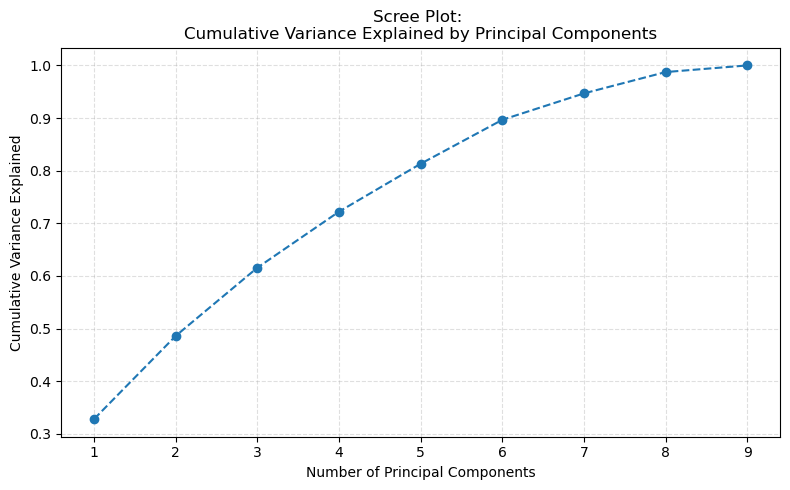

In [102]:
# Drop non-numeric columns
model_numeric = model_data.drop(columns=['Country_Name', 'Country_Code'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(model_numeric)

# Applying PCA
pca = PCA()
pca_result = pca.fit(scaled_data)

# Scree plot (variance explained)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title("Scree Plot: \nCumulative Variance Explained by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

From the above plot, we can conclude that:
- The first 3–4 components explain over 70% of the variance
- Around 8 components explain more than 90% of the variance

This means we can reduce dimensionality significantly while still retaining most of the important information in the dataset.

In [103]:

# Step 1: Drop country name/code for PCA
features = model_data.drop(columns=['Country_Name', 'Country_Code'])

# Step 2: Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply PCA
pca = PCA(n_components=2)  # 2 components for easy visualization
principal_components = pca.fit_transform(scaled_features)

# Step 4: Create PCA dataframe
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Country_Name'] = model_data['Country_Name'].values
pca_df['Country_Code'] = model_data['Country_Code'].values

# Preview
print("PCA Data Preview:")
display(pca_df.head())


PCA Data Preview:


,PC1,PC2,Country_Name,Country_Code
0,-0.056184,0.615905,Afghanistan,AFG
1,0.016724,-1.268107,Albania,ALB
2,0.746044,0.420201,Algeria,DZA
3,-2.273670,1.980610,Angola,AGO
4,1.195379,0.114458,Antigua and Barbuda,ATG


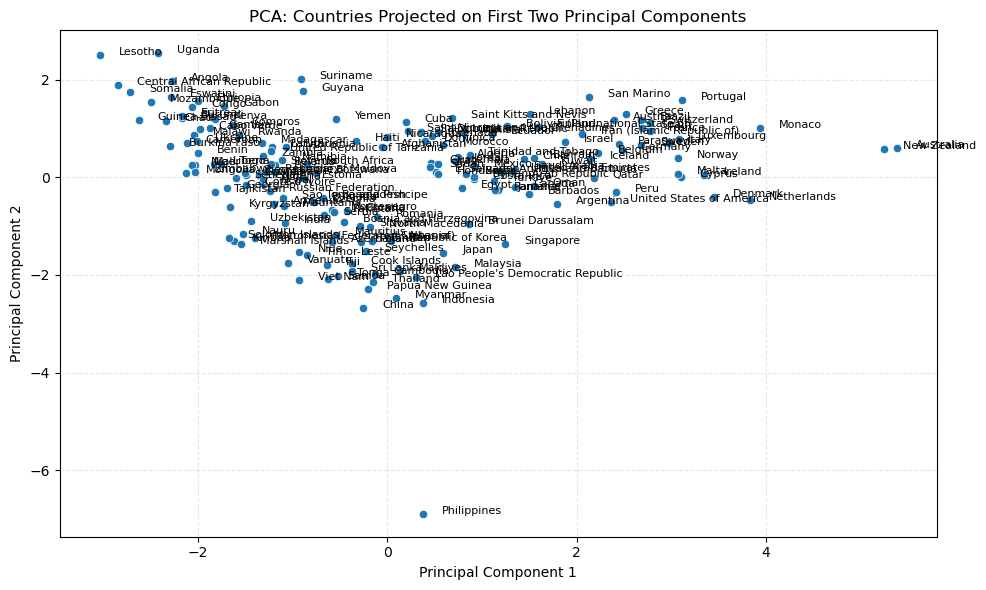

In [104]:
# 2D PCA Scatter Plot for Country Groupings

# Transform data to 2D using PCA
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(scaled_data)

# Create DataFrame for plotting
pca_df = pd.DataFrame(pca_2d_result, columns=['PC1', 'PC2'])
pca_df['Country_Name'] = model_data['Country_Name'].values

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue=None)
for i in range(pca_df.shape[0]):
    plt.text(pca_df['PC1'][i]+0.2, pca_df['PC2'][i], pca_df['Country_Name'][i], fontsize=8)

plt.title("PCA: Countries Projected on First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

##### Simplifying the above plot:

In [105]:
# Grouping countries by continent
continent_mapping = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia', # Can be considered Europe sometimes
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia (Plurinational State of)': 'South America', 
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia', 
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa', 
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Congo (Democratic Republic of the)': 'Africa', 
    'Cook Islands': 'Oceania',
    'Costa Rica': 'North America',
    'Côte d\'Ivoire': 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia', 
    'Czechia': 'Europe',                    # Czech Republic
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa', # formerly Swaziland
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Europe', 
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran (Islamic Republic of)': 'Asia', 
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Lao People\'s Democratic Republic': 'Asia', 
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Micronesia (Federated States of)': 'Oceania',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia', 
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Oceania',
    'North Macedonia': 'Europe', 
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Republic of Korea': 'Asia', 
    'Republic of Moldova': 'Europe', 
    'Romania': 'Europe',
    'Russian Federation': 'Europe',    # Russia
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Asia', 
    'Syria': 'Asia', 
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Türkiye': 'Asia', 
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United Republic of Tanzania': 'Africa',  # Tanzania
    'United States of America': 'North America', 
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela (Bolivarian Republic of)': 'South America', 
    'Venezuela': 'South America', 
    'Viet Nam': 'Asia',                        # Vietnam
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa',
}

continent_mapping_df = pd.DataFrame(list(continent_mapping.items()), columns=['Country_Name', 'Continent'])
continent_mapping_df.head()

,Country_Name,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [106]:
# Drop existing 'Continent' column if it exists
if 'Continent' in pca_df.columns:
    pca_df.drop(columns='Continent', inplace=True)

# Now re-merge safely
pca_df = pca_df.merge(continent_mapping_df, on='Country_Name', how='left')

# Preview
print(pca_df[['Country_Name', 'Continent']].drop_duplicates().head())

          Country_Name      Continent
0          Afghanistan           Asia
1              Albania         Europe
2              Algeria         Africa
3               Angola         Africa
4  Antigua and Barbuda  North America


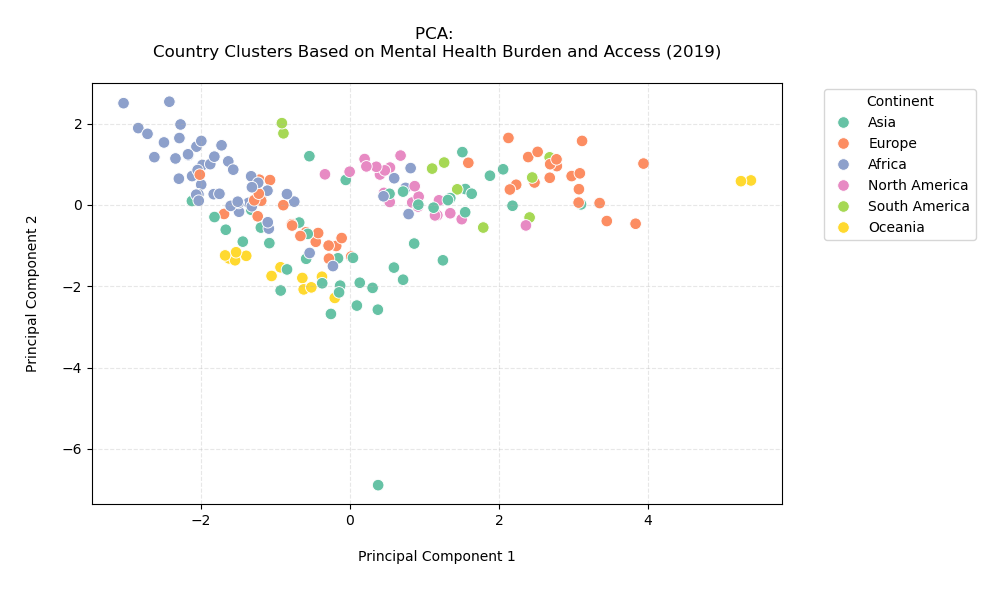

In [107]:
# Re-plot with continent colors
# Plot PCA with continent-based coloring
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Continent', palette='Set2', s=70)

plt.title("\nPCA: \nCountry Clusters Based on Mental Health Burden and Access (2019)\n")
plt.xlabel("\nPrincipal Component 1\n")             # largest variance 
plt.ylabel("\nPrincipal Component 2\n")             # second largest variance
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### ***K-Means Clustering***

K-means is used to partition countries into distinct groups based on similarities in mental health burden and access.

This helps identify clusters of countries with similar profiles, which may guide future policy comparisons or support needs.

We use the same standardized dataset used for PCA, based on:

- DALYs (2019) from multiple mental & substance use disorders
- Access indicators like presence of policy, services, and legislation

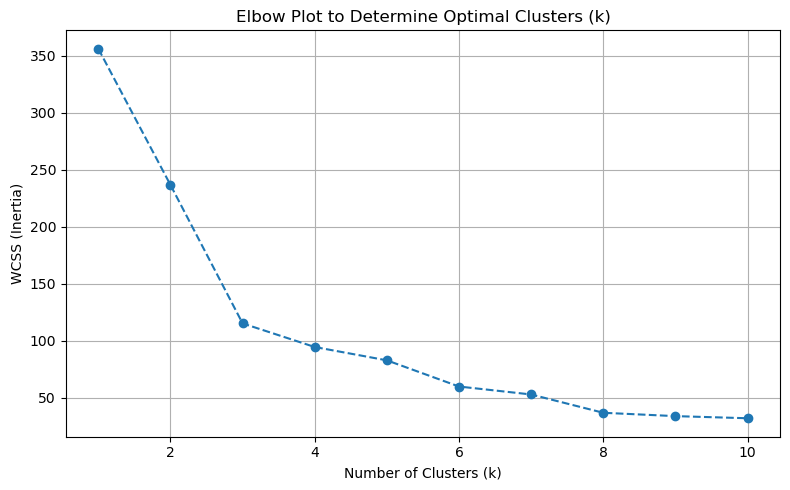

In [109]:
# Scaling for the Elbow method

# Drop only columns that exist
cols_to_drop = [col for col in ['Country_Name', 'Country_Code', 'Continent'] if col in pca_df.columns]

# Features used for clustering
kmeans_features = pca_df.drop(columns=cols_to_drop)

# Scaling the data
scaler = StandardScaler()
kmeans_scaled = scaler.fit_transform(kmeans_features)

# WCSS (Within-Cluster Sum of Squares) for different k
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(kmeans_scaled)
    wcss.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Plot to Determine Optimal Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.tight_layout()
plt.show()

Comment:

As k increases, WCSS decreases because clusters become tighter. The *elbow point* (around k=4 in this plot) indicates the optimal number of clusters, where adding more clusters provides diminishing returns in reducing WCSS. In this case, k=4 is likely the best choice, as the curve flattens significantly after that point.

In [110]:
# KMeans with chosen number of clusters
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans_final.fit_predict(kmeans_scaled)

# Adding cluster labels to the original PCA DataFrame
pca_df['KMeans_Cluster'] = cluster_labels

# Preview
print("Clustered PCA Data:")
display(pca_df.head())

Clustered PCA Data:


,PC1,PC2,Country_Name,Continent,KMeans_Cluster
0,-0.056184,0.615905,Afghanistan,Asia,3
1,0.016724,-1.268107,Albania,Europe,2
2,0.746044,0.420201,Algeria,Africa,1
3,-2.273670,1.980610,Angola,Africa,0
4,1.195379,0.114458,Antigua and Barbuda,North America,1


In [111]:
# Missing continent information (if any)
missing_continents = pca_df[pca_df['Continent'].isna()]['Country_Name'].unique()
print("Countries with missing continent info:")
print(missing_continents)

Countries with missing continent info:
[]


In [112]:
# PC1 and PC2 mean values for each cluster

print("Mean PC1 and PC2 values for each cluster:")
print(pca_df.groupby('KMeans_Cluster')[['PC1', 'PC2']].mean())

Mean PC1 and PC2 values for each cluster:
                     PC1       PC2
KMeans_Cluster                    
0              -2.033316  1.391388
1               1.786616  0.459362
2              -0.357683 -1.729563
3              -1.214978  0.000895


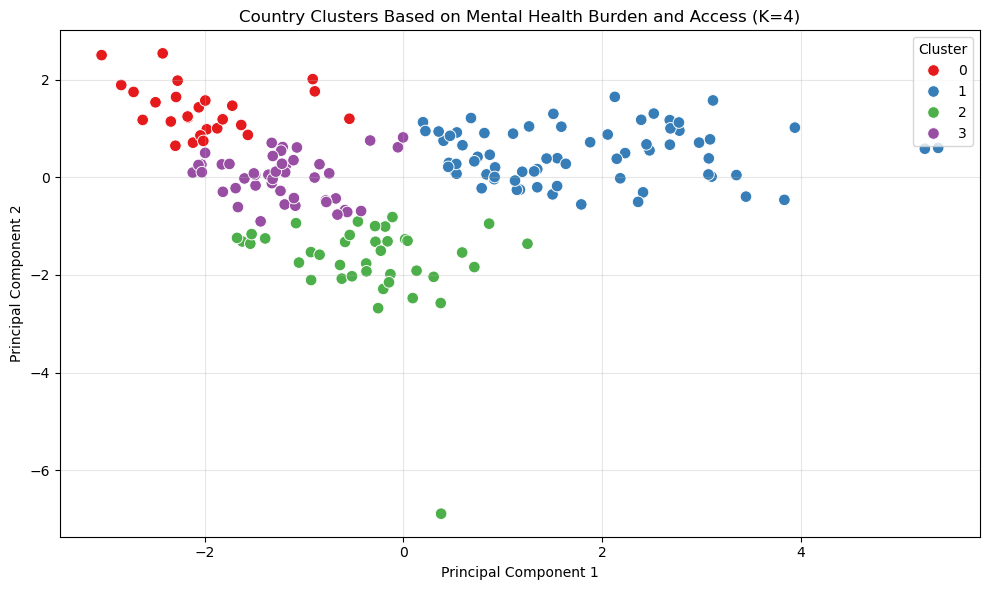

In [113]:
# Plot for KMeans clusters on PCA-reduced data

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='Set1', s=70)
plt.title("Country Clusters Based on Mental Health Burden and Access (K=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [114]:
# Merging cluster labels back to main model_data for interpretation
clustered_data = model_data.merge(pca_df[['Country_Name', 'KMeans_Cluster']], on='Country_Name')

# Average indicators per cluster
cluster_summary = clustered_data.groupby('KMeans_Cluster').mean(numeric_only=True).round(2)

# Summary
print("Cluster-wise Averages:")
display(cluster_summary)

Cluster-wise Averages:


,Anxiety,Bipolar,Depression,Eating Disorders,Schizophrenia,Self-Harm,Has_MH_Policy,Has_MH_Legislation
KMeans_Cluster,,,,,,,,
0,426.35,117.60,806.96,41.01,124.74,787.09,0.15,0.65
1,638.38,172.74,533.45,105.87,160.13,298.98,0.72,0.82
2,450.17,78.82,371.23,50.67,163.81,468.77,0.62,0.90
3,409.39,106.50,605.44,46.04,132.83,544.15,0.71,0.73


In [115]:
# Exporting the clustered data to CSV (optional)
# clustered_data.to_csv("final_kmeans_clusters.csv", index=False)

### ***Hierarchial Clustering and Dendogram***

Hierarchical clustering builds a tree-like structure of nested clusters by either merging or splitting them, based on similarity. Unlike K-means, it does not require pre-specifying the number of clusters.

- We use the Ward linkage method to minimize variance within clusters.
- The dendrogram visually shows how countries group together based on mental health DALYs and access indicators (via PCA components).
- By cutting the tree at different heights, we can explore different numbers of clusters and cluster relationships.

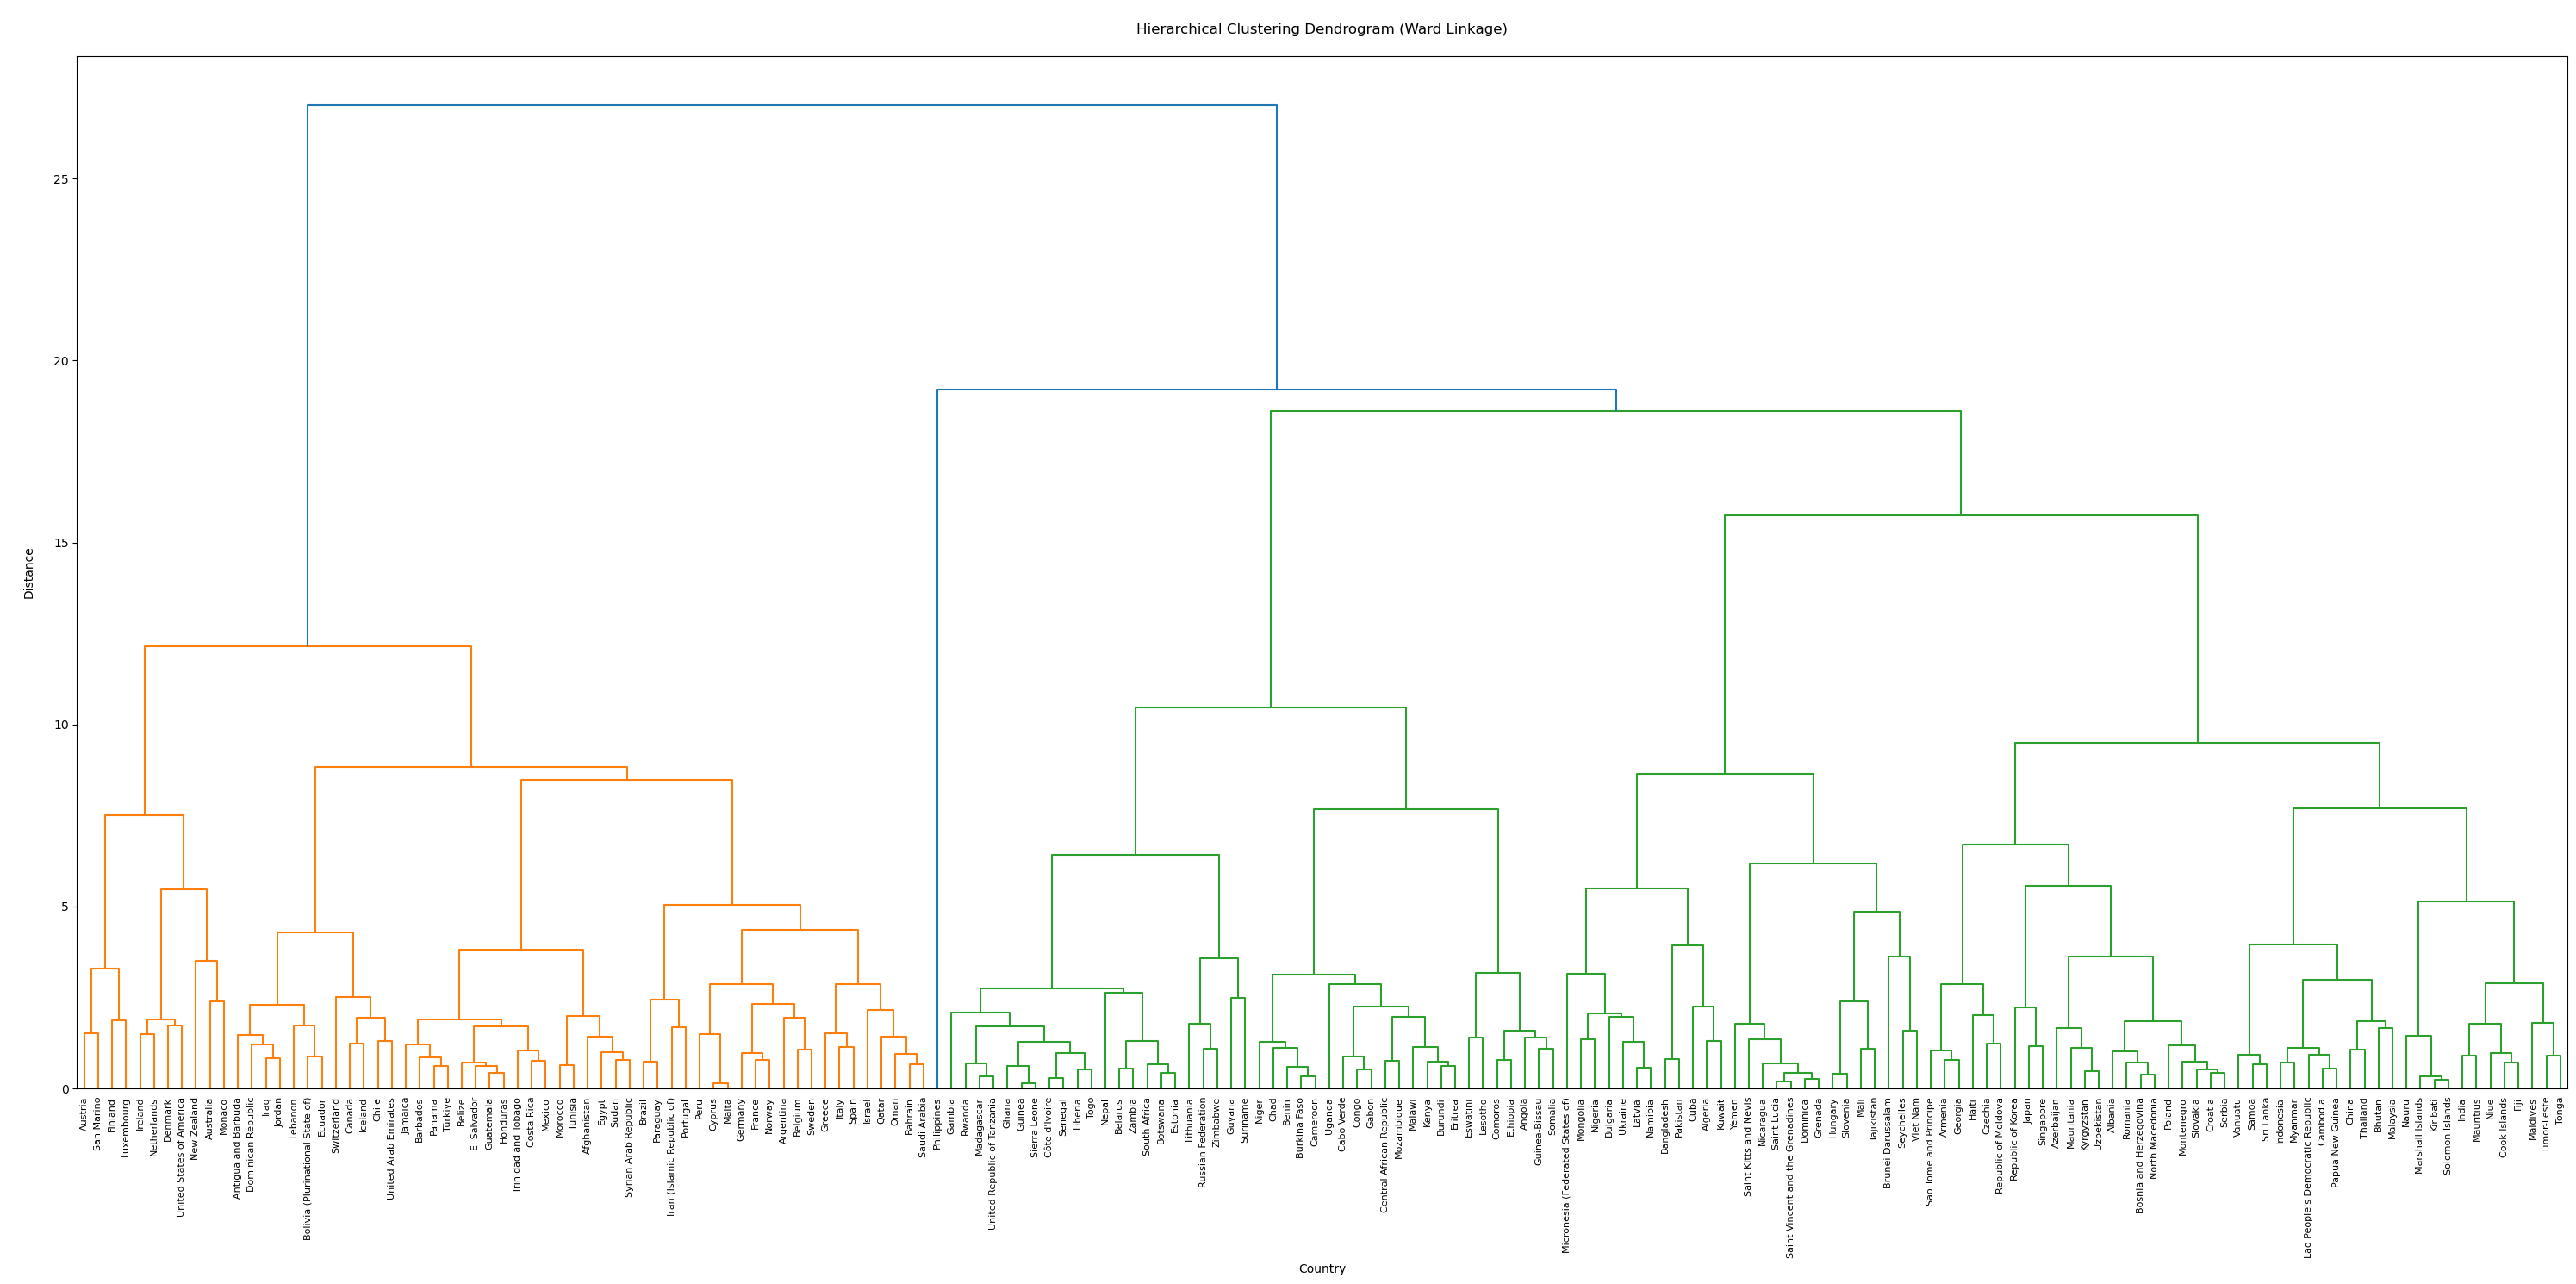

In [116]:
# Recreating pca_features 
pca_features = model_data.drop(columns=['Country_Name', 'Country_Code'])

# Scaling
scaler = StandardScaler()
kmeans_scaled = scaler.fit_transform(pca_features)

# Linkage matrix
linkage_matrix = linkage(kmeans_scaled, method='ward')

# Extract labels
labels = model_data['Country_Name'].values

# Dendrogram
plt.figure(figsize=(30, 15))
dendrogram(linkage_matrix, labels=labels, leaf_rotation=90, leaf_font_size=8)
plt.title("\nHierarchical Clustering Dendrogram (Ward Linkage)\n")
plt.xlabel("Country")
plt.ylabel("\nDistance\n")
plt.tight_layout()
plt.show()

Comments:
- This dendrogram visualizes the results of hierarchical clustering using the Ward linkage method, which groups countries based on similarities in mental health burden (DALYs) and access factors such as policy, services, and legislation. 

- This plot helps identify how countries naturally form clusters. 

- For example, countries with similar healthcare investment and mental health outcomes tend to group together. 

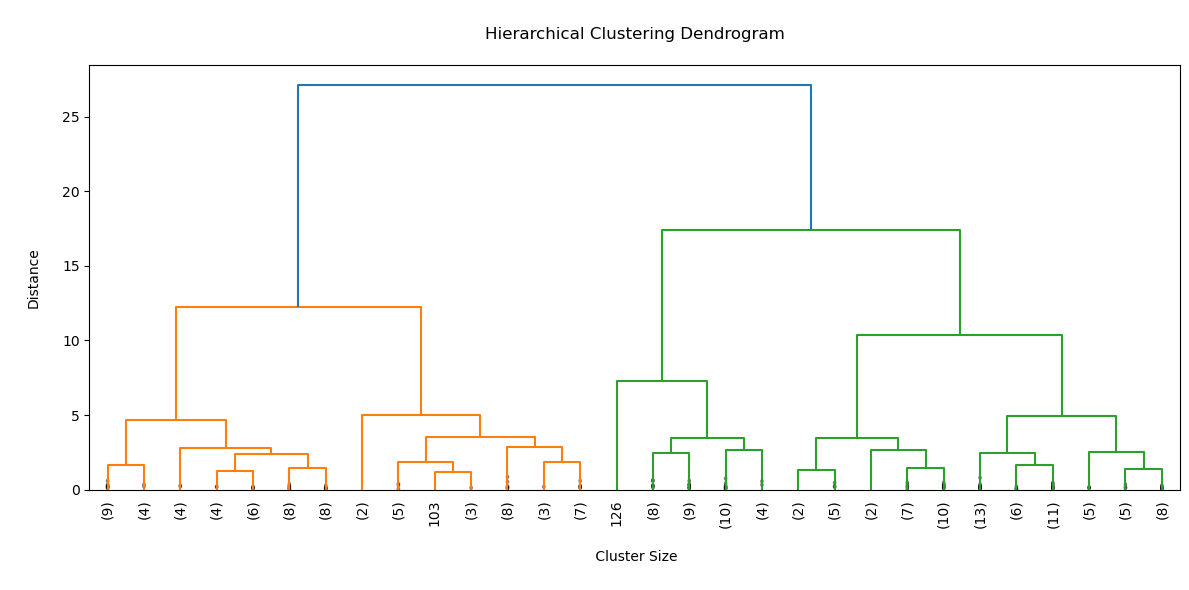

In [117]:
# Data to use for clustering
dendro_features = pca_df[['PC1', 'PC2']]

# Linkage matrix
linked = linkage(dendro_features, method='ward')

# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10., show_contracted=True)
plt.title("\nHierarchical Clustering Dendrogram\n")
plt.xlabel("\n Cluster Size\n")
plt.ylabel("\nDistance\n")
plt.tight_layout()
plt.show()

Comments:
- This simplified dendrogram also uses Ward linkage, but instead of labeling countries, it displays sample indices or group sizes at each leaf.

- This plot is useful for determining the optimal number of clusters. By observing the height of the biggest vertical jumps, we can decide where to "cut" the tree to define distinct clusters. 

***Unsupervised Learning Conclusion***

- PCA was used to reduce dimensionality and highlight patterns in mental health burden and access data. 

- K-Means clustering (k=4), guided by the Elbow plot, revealed clear country groupings. 

- Hierarchical clustering confirmed similar structures through dendrograms. 

Overall, K-Means was chosen as the preferred model for its clarity and scalability in this context.

### ***Supervised Learning***

Using various supervised machine learning models to find out if we can *“Predict a country’s access to mental health resources based on disorder burden and socioeconomic indicators?”*

In [118]:
# The purpose of this modeling is to build predictive systems that learn from labeled data. 
# This model will train models to classify whether a country has policies, 
# services, or legislation for mental health in place (Yes/No), based on:
# 1. Average DALYs from various mental and substance use disorders
# 2. Socioeconomic indicators such as GDP per capita
# 3. Country-specific variation in disorder burden

In [119]:
print("Columns in access_years_names:")
print(access_years_named.columns.tolist())

# Optional: preview a few rows
display(access_years_named.head())

Columns in access_years_names:
['Country_Name', 'Country_Code', 'Policy_Year', 'Services_Year', 'Legislation_Year']


,Country_Name,Country_Code,Policy_Year,Services_Year,Legislation_Year
0,Afghanistan,AFG,2011,2014,2014
1,Albania,ALB,2011,2014,2014
2,Argentina,ARG,2011,2014,2014
3,Australia,AUS,2011,2014,2014
4,Azerbaijan,AZE,2011,2014,2014


#### ***Regression***

Important!!!
- Although DALY values are from 2019-2021, and legislation from 2011-2015, this model can be used to identify in how mental health burden align with structural responses across countris.

- Can be used as a predictive tool to understand temporal relationships.

In [120]:
# Exporting the CSV files (optional)
# model_data.to_csv("model_data.csv", index=False)

# Save access_years_named to CSV
# access_years_named.to_csv("access_years_named.csv", index=False)

In [121]:
from sklearn.impute import SimpleImputer

# Merging access_years_named into model_data (on Country_Code)
merged_data = model_data.merge(access_years_named, on='Country_Code', how='inner')

# Drop rows where target variable is missing
merged_data.dropna(subset=['Policy_Year'], inplace=True)  # You can change this to 'Services_Year' or 'Legislation_Year' as needed

# Applying SimpleImputer to features
features = merged_data.drop(columns=['Country_Name_x', 'Country_Name_y', 'Country_Code', 'Policy_Year', 'Services_Year', 'Legislation_Year'])
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Converting imputed array back to original DataFrame format
features_df = pd.DataFrame(features_imputed, columns=features.columns)

# Attaching target variable back
target = merged_data['Policy_Year'].reset_index(drop=True)  # or use 'Services_Year', 'Legislation_Year'
final_data = pd.concat([features_df, target], axis=1)

# Preview
print("Final dataset ready for supervised learning:")
display(final_data.head())

Final dataset ready for supervised learning:


,Anxiety,Bipolar,Depression,Eating Disorders,Schizophrenia,Self-Harm,Has_MH_Policy,Has_MH_Services,Has_MH_Legislation,Policy_Year
0,594.364685,145.375285,661.645476,39.454103,120.467604,250.768092,1.0,1.0,1.0,2011
1,494.866890,105.594561,358.418816,46.929557,134.165576,178.514716,1.0,1.0,1.0,2011
2,575.854594,151.111125,562.846205,67.405705,147.689121,142.006682,1.0,1.0,0.0,2011
3,618.829956,154.685856,351.371604,105.105208,165.006210,506.231855,1.0,1.0,1.0,2011
4,615.026772,216.006743,534.518440,287.755614,229.782206,517.485399,1.0,1.0,1.0,2011


In [127]:
# Feature columns (all disorder columns)
feature_cols = ['Anxiety', 'Bipolar', 'Depression', 'Eating Disorders', 'Schizophrenia', 'Self-Harm']
X = final_data[feature_cols]

# Target variable
y = final_data['Has_MH_Legislation']

# Preview
print("Features shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Features shape: (77, 6)
Target distribution:
 Has_MH_Legislation
1.0    70
0.0     7
Name: count, dtype: int64


In [129]:
# Define features (X) and target (y)
X = final_data[['Anxiety', 'Bipolar', 'Depression', 'Eating Disorders', 'Schizophrenia', 'Self-Harm']]
y = final_data['Has_MH_Legislation']

# Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Preview
print("Training features shape:", X_train.shape)
print("Training target distribution:\n", y_train.value_counts())

Training features shape: (61, 6)
Training target distribution:
 Has_MH_Legislation
1.0    57
0.0     4
Name: count, dtype: int64


In [ ]:
# Model training
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Prediction on test data
y_pred = logreg.predict(X_test)

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
 [[ 0  3]
 [ 0 13]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.81      1.00      0.90        13

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16



Comments:
- All 3 countries that actually don't have MH legislation were incorrectly predicted as having it.

- All 13 countries that do have MH legislation were correctly predicted.

- Overall accuracy of the model is 81%. 

- But it is misleading due to imbalance (the model is biased toward predicting 'Yes')

#### ***Random Forest***

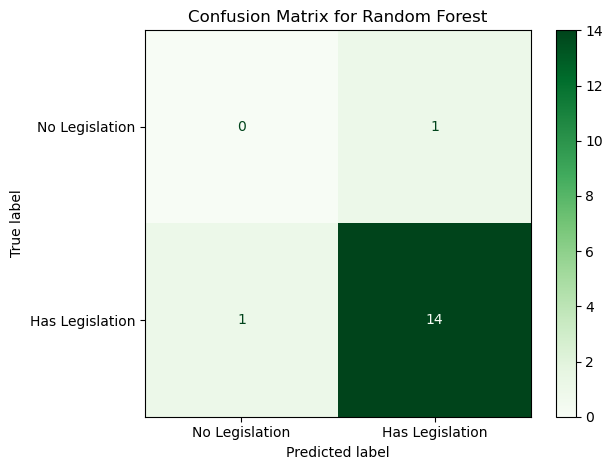


Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.93      0.93      0.93        15

    accuracy                           0.88        16
   macro avg       0.47      0.47      0.47        16
weighted avg       0.88      0.88      0.88        16



In [144]:
# Features and target
feature_cols = ['Anxiety', 'Bipolar', 'Depression', 'Eating Disorders', 'Schizophrenia', 'Self-Harm']
X = final_data[feature_cols]
y = final_data['Has_MH_Legislation']

# Hndling missing values using SimpleImputer (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
disp = ConfusionMatrixDisplay.from_estimator(
    rf_model, X_test, y_test, cmap='Greens', display_labels=["No Legislation", "Has Legislation"]
)
disp.ax_.set_title("Confusion Matrix for Random Forest")
plt.tight_layout()
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Comment:
- The Random Forest classifier achieved an ***accuracy of 88%***, performing well on the majority class (countries with mental health legislation). 
- However, it failed to correctly classify the minority class (countries without legislation).

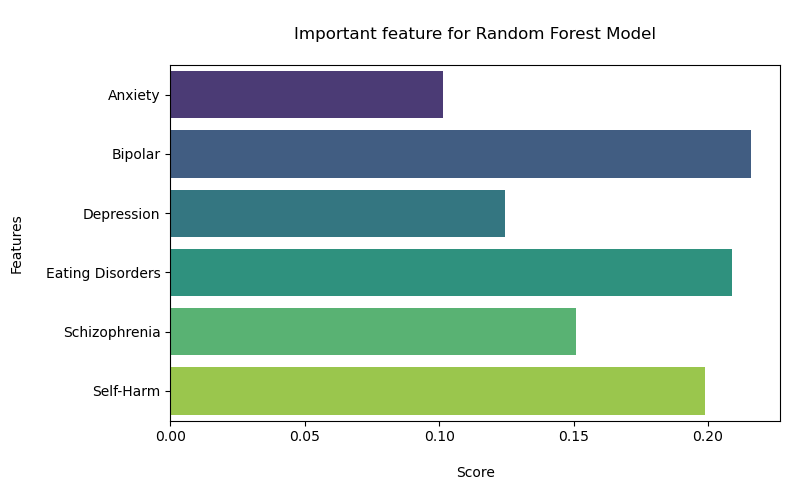

In [142]:
# Feature importances
importances = rf_model.feature_importances_
features = feature_cols

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('\nImportant feature for Random Forest Model\n')
plt.xlabel('\nScore')
plt.ylabel('Features\n')
plt.tight_layout()
plt.show()

#### ***Logistic Regression***

In [143]:
# Initialize and train model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Confusion Matrix:
 [[ 0  1]
 [ 0 15]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.94      1.00      0.97        15

    accuracy                           0.94        16
   macro avg       0.47      0.50      0.48        16
weighted avg       0.88      0.94      0.91        16



Interpretation:

- The Logistic Regression model achieved ***94% accuracy***, which is excellent overall. 

- However, it failed to correctly identify the one country without mental health legislation (class 0.0), predicting all test samples as positive (class 1.0). 

This again highlights the class imbalance issue, where the model becomes biased toward the majority class. Although performance on the majority class is strong, the inability to identify minority cases is a limitation.

#### ***Decision Tree Classification***

Confusion Matrix:
 [[ 0  1]
 [ 2 13]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.93      0.87      0.90        15

    accuracy                           0.81        16
   macro avg       0.46      0.43      0.45        16
weighted avg       0.87      0.81      0.84        16



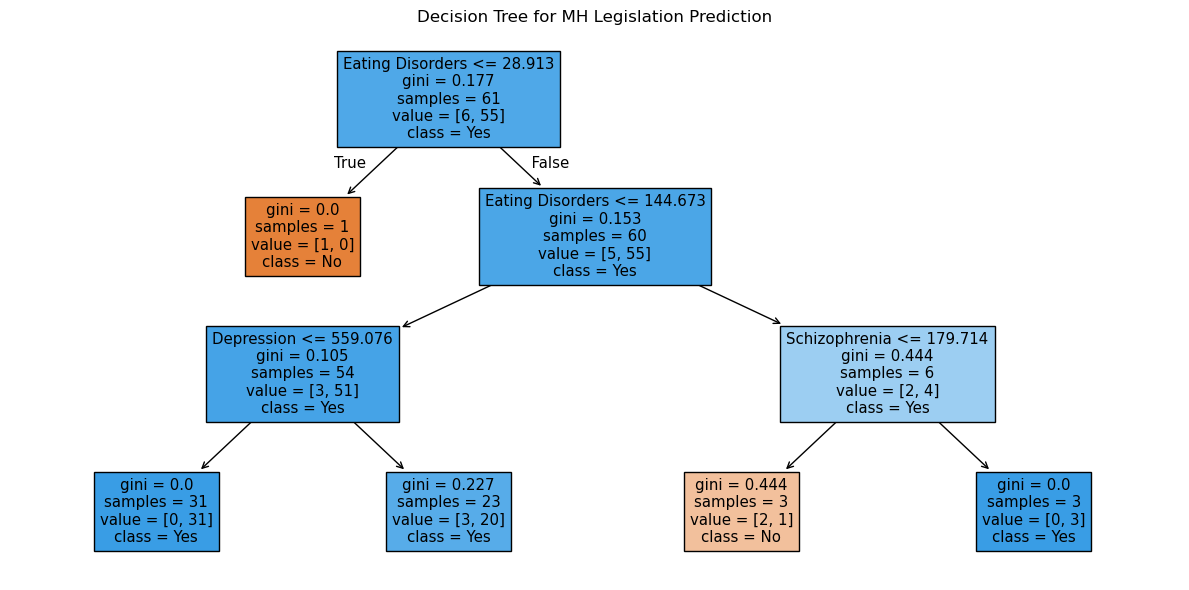

In [ ]:
# Target and train-test split
y = final_data['Has_MH_Legislation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Optional: Visualize Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=feature_cols, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree: \nMH Legislation Prediction")
plt.tight_layout()
plt.show()

The tree primarily splits based on Eating Disorders, Depression, and Schizophrenia, suggesting these disorders carry the most weight in legislative presence.

- ***Accuracy: 81%***
- Precision (Class 1): 93%
- Recall (Class 1): 87%

Misclassification because of Class 0 (no legislation) is consistently underpredicted due to imbalance.

#### ***Support Vector Machines (SVM)***

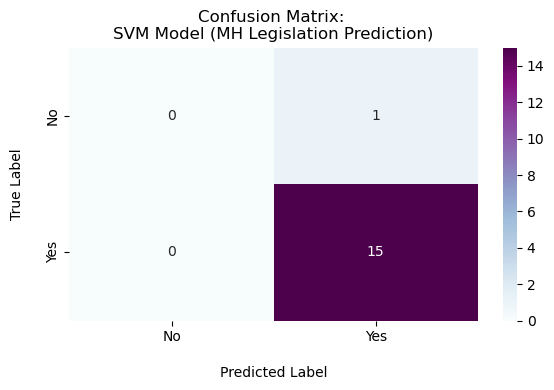


Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.94      1.00      0.97        15

    accuracy                           0.94        16
   macro avg       0.47      0.50      0.48        16
weighted avg       0.88      0.94      0.91        16



In [156]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Features and target
feature_cols = ['Anxiety', 'Bipolar', 'Depression', 'Eating Disorders', 'Schizophrenia', 'Self-Harm']
X = final_data[feature_cols]
y = final_data['Has_MH_Legislation']

# Train-test split (70/ 30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluation

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('\nPredicted Label')
plt.ylabel('True Label\n')
plt.title('Confusion Matrix: \nSVM Model (MH Legislation Prediction)')
plt.tight_layout()
plt.show()
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Interpretations:
- Correctly predicted countries with MH legislation.
- One country without legislation was incorrectly classified as having it.
- Precision (1.0 class) was 94%, meaning that most of the predicted positives were correct.
- Recall (1.0 class) was 100%, meaning that it captured all true positives.
 
Model had the overall ***accuracy of 94%***.

***Conclusion***

The SVM and Logistic models  both yielded 94% accuracy, making them the top-performing models.

However, all models struggled to predict the minority class (countries without MH legislation) due to class imbalance.

For real-world deployment, class balancing techniques or a larger, more diverse dataset would improve reliability.

### ***Summary***

The project successfully demonstrated that machine learning is a powerful tool for both uncovering complex global patterns and disparities in mental health burdens and for accurately predicting the existence of critical access-related infrastructure. This provides valuable insights for understanding the global mental health landscape and potentially informing policy and resource allocation.